# Group 11 Phase 1 Submission

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

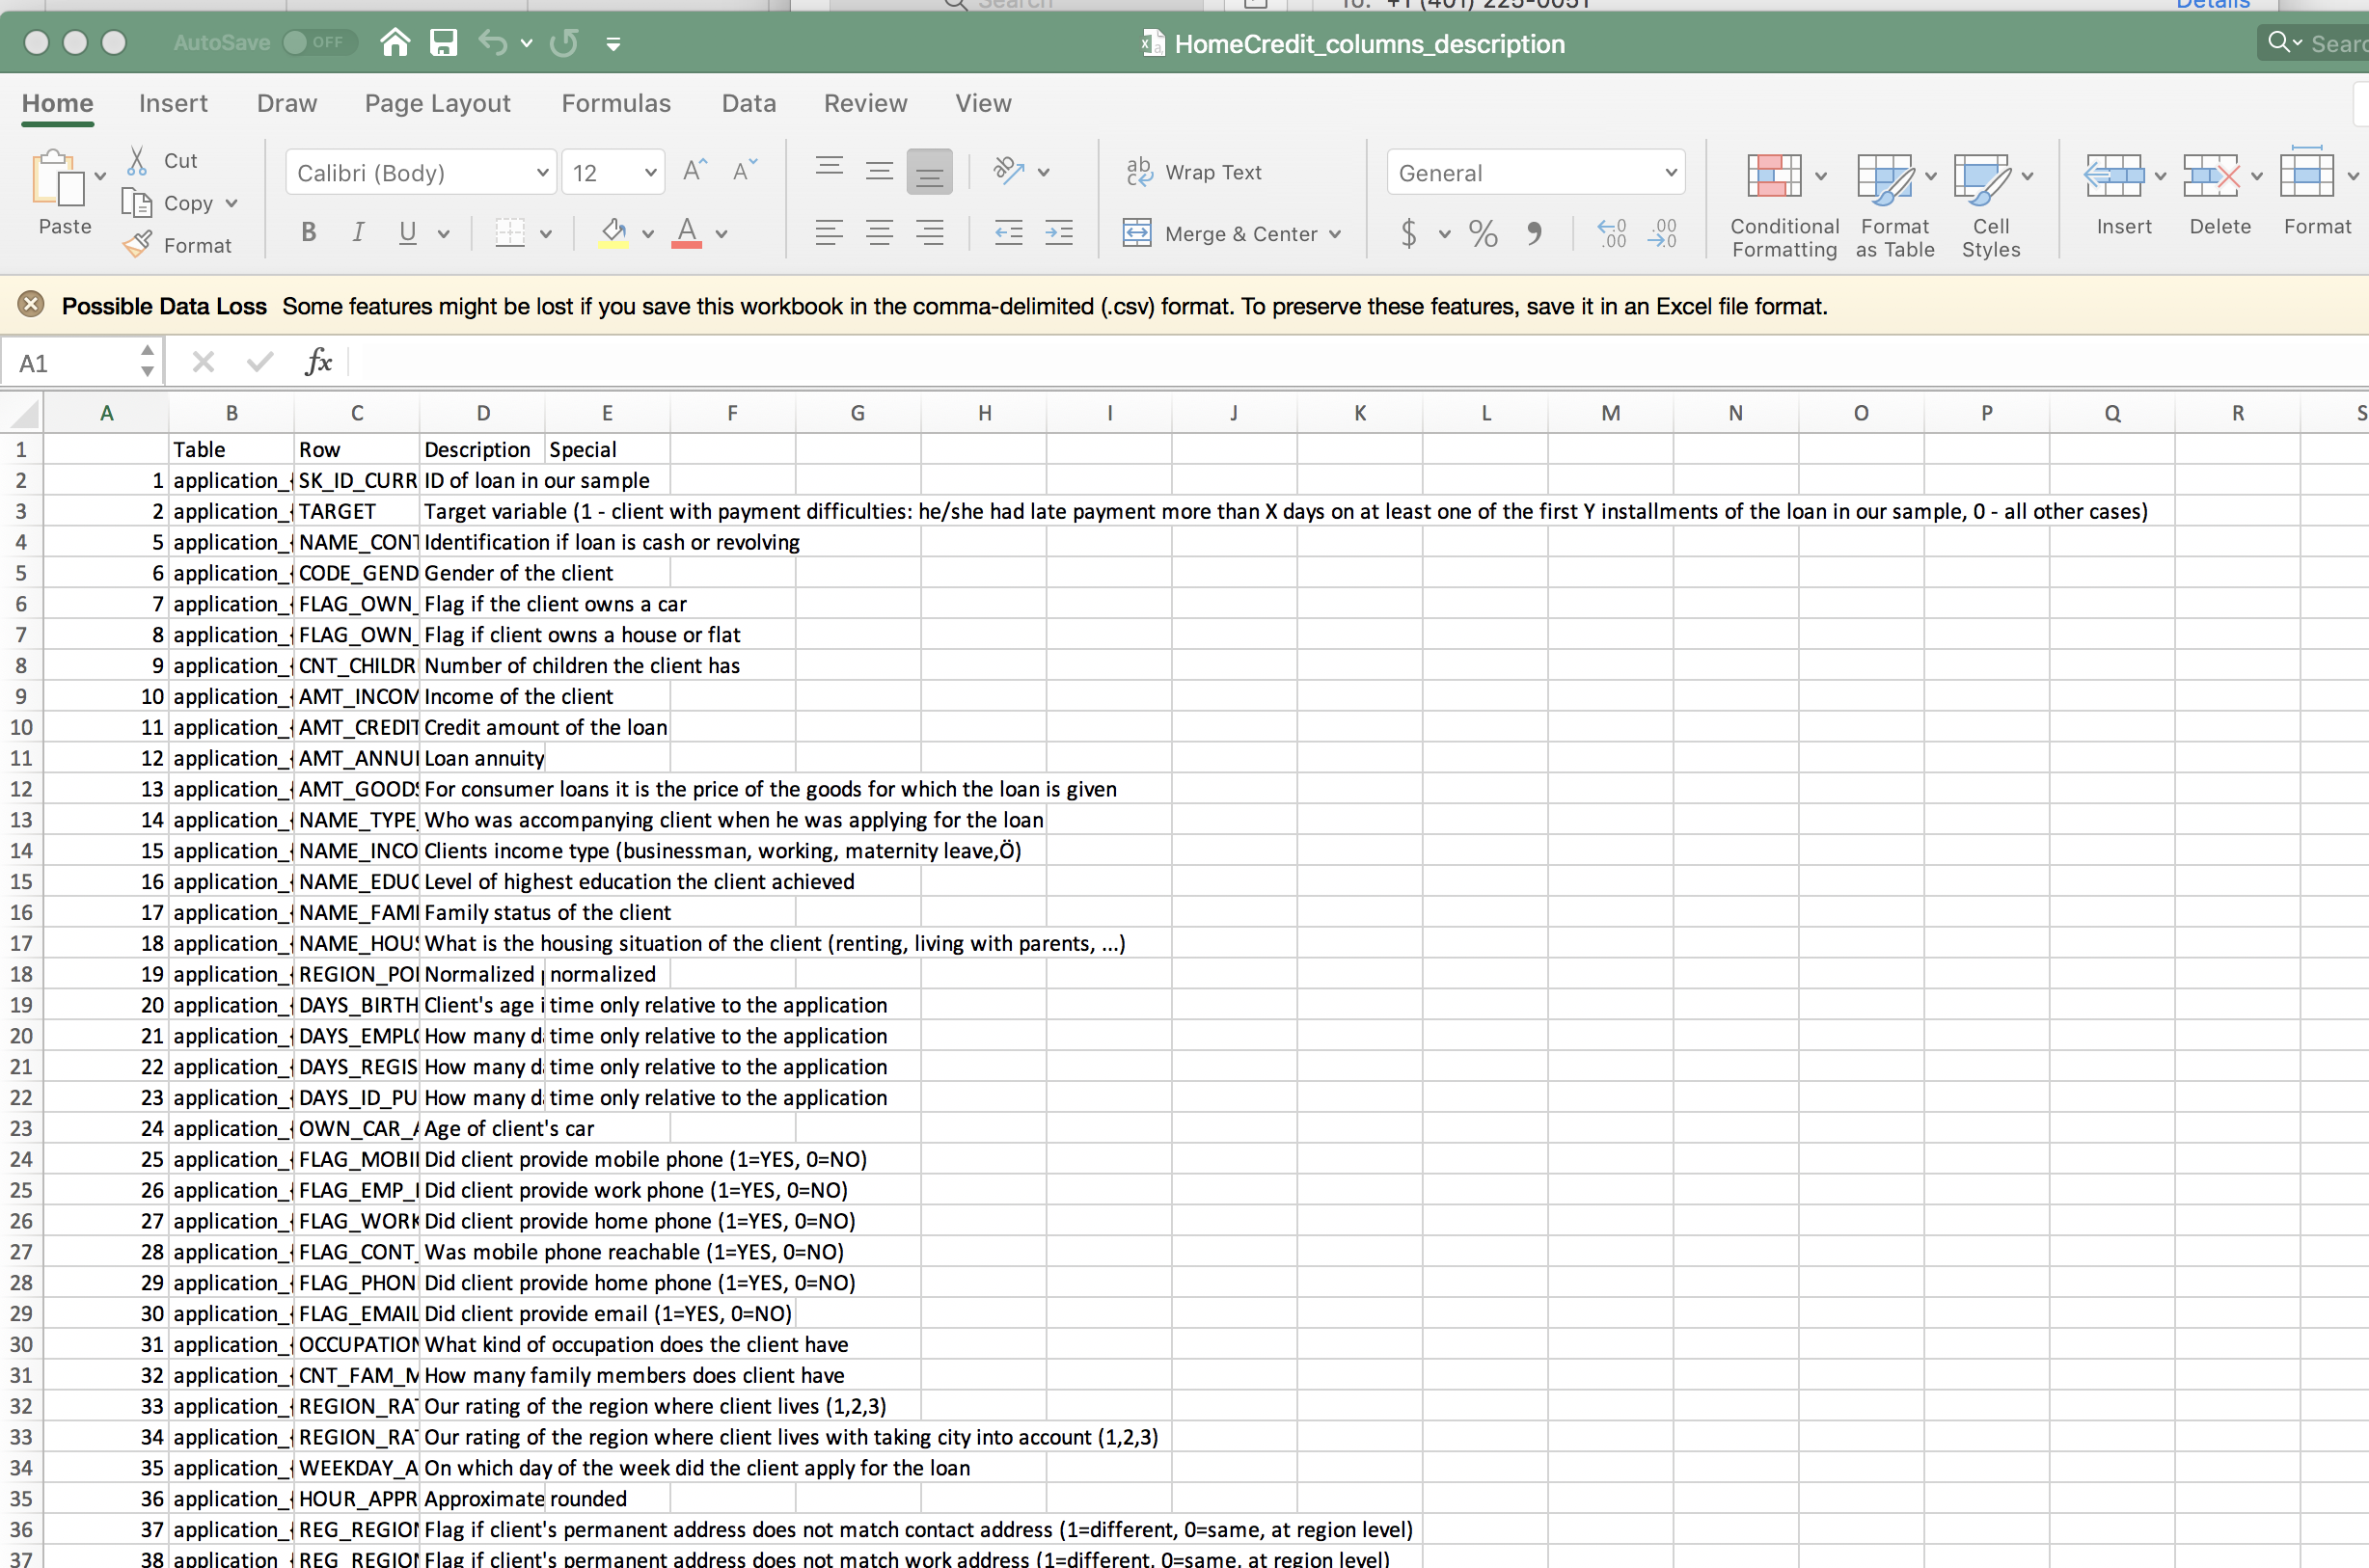

### Imports

In [4]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [6]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily

ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(f'{ds_name}.csv', ds_name)

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF          

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
SK_ID_PREV                int64
SK_ID_CURR                int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER     int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOS

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               int64
SK_ID_CURR               int64
MONTHS_BALANCE           int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS     object
SK_DPD                   int64
SK_DPD_DEF               int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [5]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## Summary of Application train

In [21]:
app_train = datasets["application_train"]

In [42]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 123 entries, SK_ID_CURR to DAYS_EMPLOYED_ANOM
dtypes: bool(1), float64(66), int64(40), object(16)
memory usage: 286.5+ MB


In [43]:
app_train.describe() #numerical only features

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  252137.000000  ...   
mean                     0.020868   16036.995067   -2384.169325  ...   
std                      0.013831    4363.988632    2338.360162  ...   
min                      0.000290    7489.000000  -17912.000000  ...   
25%                      0.010006   12413.000000   -3175.000000  ...   
50%                      0.018850   15750.000000   -1648.000000  ...   
75%                      0.028663   19682.000000    -767.000000  ...   
max                      0.072508   25229.000000       0.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [44]:
app_train.describe() #numerical only features

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  252137.000000  ...   
mean                     0.020868   16036.995067   -2384.169325  ...   
std                      0.013831    4363.988632    2338.360162  ...   
min                      0.000290    7489.000000  -17912.000000  ...   
25%                      0.010006   12413.000000   -3175.000000  ...   
50%                      0.018850   15750.000000   -1648.000000  ...   
75%                      0.028663   19682.000000    -767.000000  ...   
max                      0.072508   25229.000000       0.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [ ]:
#datasets["application_train"].describe(include='all') #look at all categorical and numerical

## Missing data for application train

In [45]:
percent = (app_train.isnull().sum()/app_train.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = app_train.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
COMMONAREA_MODE             69.87               214865
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
NONLIVINGAPARTMENTS_MEDI    69.43               213514
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
FONDKAPREMONT_MODE          68.39               210295
LIVINGAPARTMENTS_MEDI       68.35               210199
LIVINGAPARTMENTS_AVG        68.35               210199
LIVINGAPARTMENTS_MODE       68.35               210199
FLOORSMIN_MEDI              67.85               208642
FLOORSMIN_AVG               67.85               208642
FLOORSMIN_MODE              67.85               208642
YEARS_BUILD_MEDI            66.50               204488
YEARS_BUILD_MODE            66.50               204488
YEARS_BUILD_AVG             66.50               204488
OWN_CAR_AGE                 65.99               202929
LANDAREA_MODE               59.38               182590
LANDAREA_AVG                59.38               182590
LANDAREA_MEDI               59.38               182590

In [46]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

Percent  Test Missing Count
COMMONAREA_MEDI             68.72               33495
COMMONAREA_AVG              68.72               33495
COMMONAREA_MODE             68.72               33495
NONLIVINGAPARTMENTS_MODE    68.41               33347
NONLIVINGAPARTMENTS_MEDI    68.41               33347
NONLIVINGAPARTMENTS_AVG     68.41               33347
FONDKAPREMONT_MODE          67.28               32797
LIVINGAPARTMENTS_AVG        67.25               32780
LIVINGAPARTMENTS_MEDI       67.25               32780
LIVINGAPARTMENTS_MODE       67.25               32780
FLOORSMIN_MEDI              66.61               32466
FLOORSMIN_MODE              66.61               32466
FLOORSMIN_AVG               66.61               32466
OWN_CAR_AGE                 66.29               32312
YEARS_BUILD_MEDI            65.28               31818
YEARS_BUILD_MODE            65.28               31818
YEARS_BUILD_AVG             65.28               31818
LANDAREA_AVG                57.96               28254
LANDAREA_MODE               57.96               28254
LANDAREA_MEDI               57.96               28254

## Distribution of the target column 

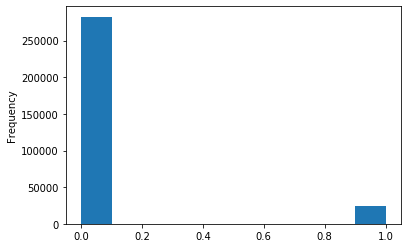

In [47]:
app_train['TARGET'].astype(int).plot.hist();

## Correlation with  the target column 

In [48]:
correlations = app_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
Name: TARGET, dtype: float64


## Applicants Age 

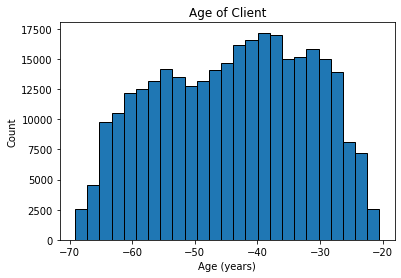

In [49]:
plt.hist(app_train['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

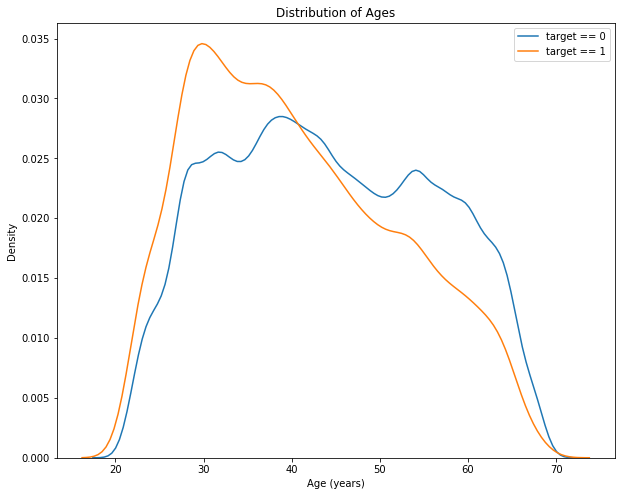

In [50]:
# By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable.
# To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. 

app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [51]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [52]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

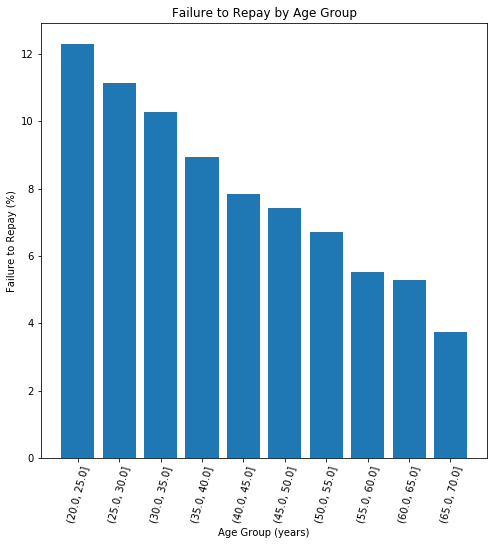

In [53]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

## Applicants occupations

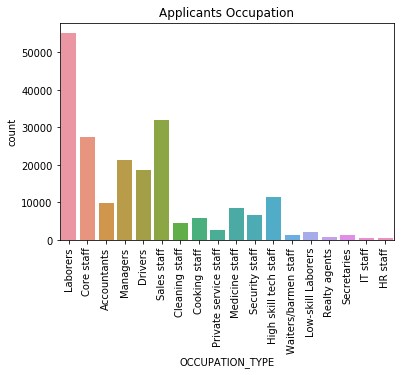

In [66]:
sns.countplot(x='OCCUPATION_TYPE', data=app_train);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

## Type of Organizations that Applicants Work For

In [73]:
app_train['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

There seem to be an awful lot of types of businesses that the applicants work for. None of them seem to be very intelligible either so grouping them into some higher level categories seems difficult. Perhaps this feature is better left out of the model.

## Applicants Gender

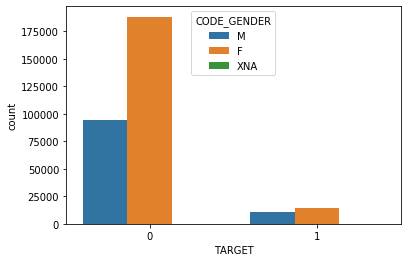

In [77]:
sns.countplot(app_train['TARGET'], hue = app_train['CODE_GENDER'])

## Type of Loan being Applied For

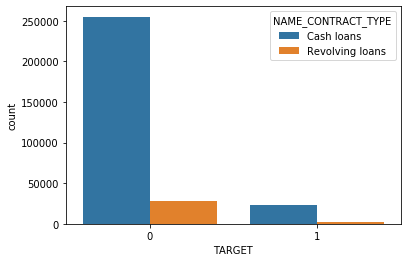

In [78]:
sns.countplot(app_train['TARGET'], hue = app_train['NAME_CONTRACT_TYPE'])

## Additional EDA
### Let's now look at the number of unique entries in each of the categorical columns.

In [75]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Let's check for anomalies

In [60]:
# Convert age in days to years
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [61]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

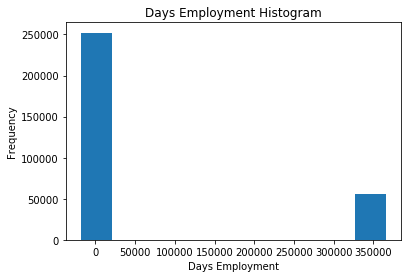

In [62]:
datasets["application_train"]['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [63]:
anom = datasets["application_train"][datasets["application_train"]['DAYS_EMPLOYED'] == 365243]
non_anom = datasets["application_train"][datasets["application_train"]['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


### Remove the anomalies and review the histogram again

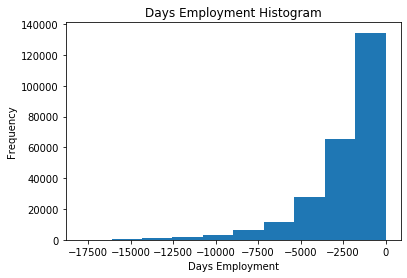

In [65]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

## EDA on additional datasets

### Dataset: previous_application

Previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.


************************** previous_applications ******************************

Performing basic EDA on previous_applications dataset

* The dataset has 1670214 rows and 37 columns.

* First 10 rows of the dataset:



SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   
5                        8  ...                  XNA         18.0   
6                       11  ...                  XNA          NaN   
7                        7  ...                  XNA          NaN   
8                       15  ...                  XNA          NaN   
9                       15  ...                  XNA          NaN   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   
5        low_normal          Cash X-Sell: low            365243.0   
6               XNA                      Cash                 NaN   
7               XNA                      Cash                 NaN   
8               XNA                      Cash                 NaN   
9               XNA                      Cash                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   
5         -654.0                    -144.0         -144.0           -137.0   
6            NaN                       NaN            NaN              NaN   
7            NaN                       NaN            NaN              NaN   
8            NaN                       NaN          


* Describing the dataset statistics:



SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115833    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]


* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         

None


* Check data distribution: 


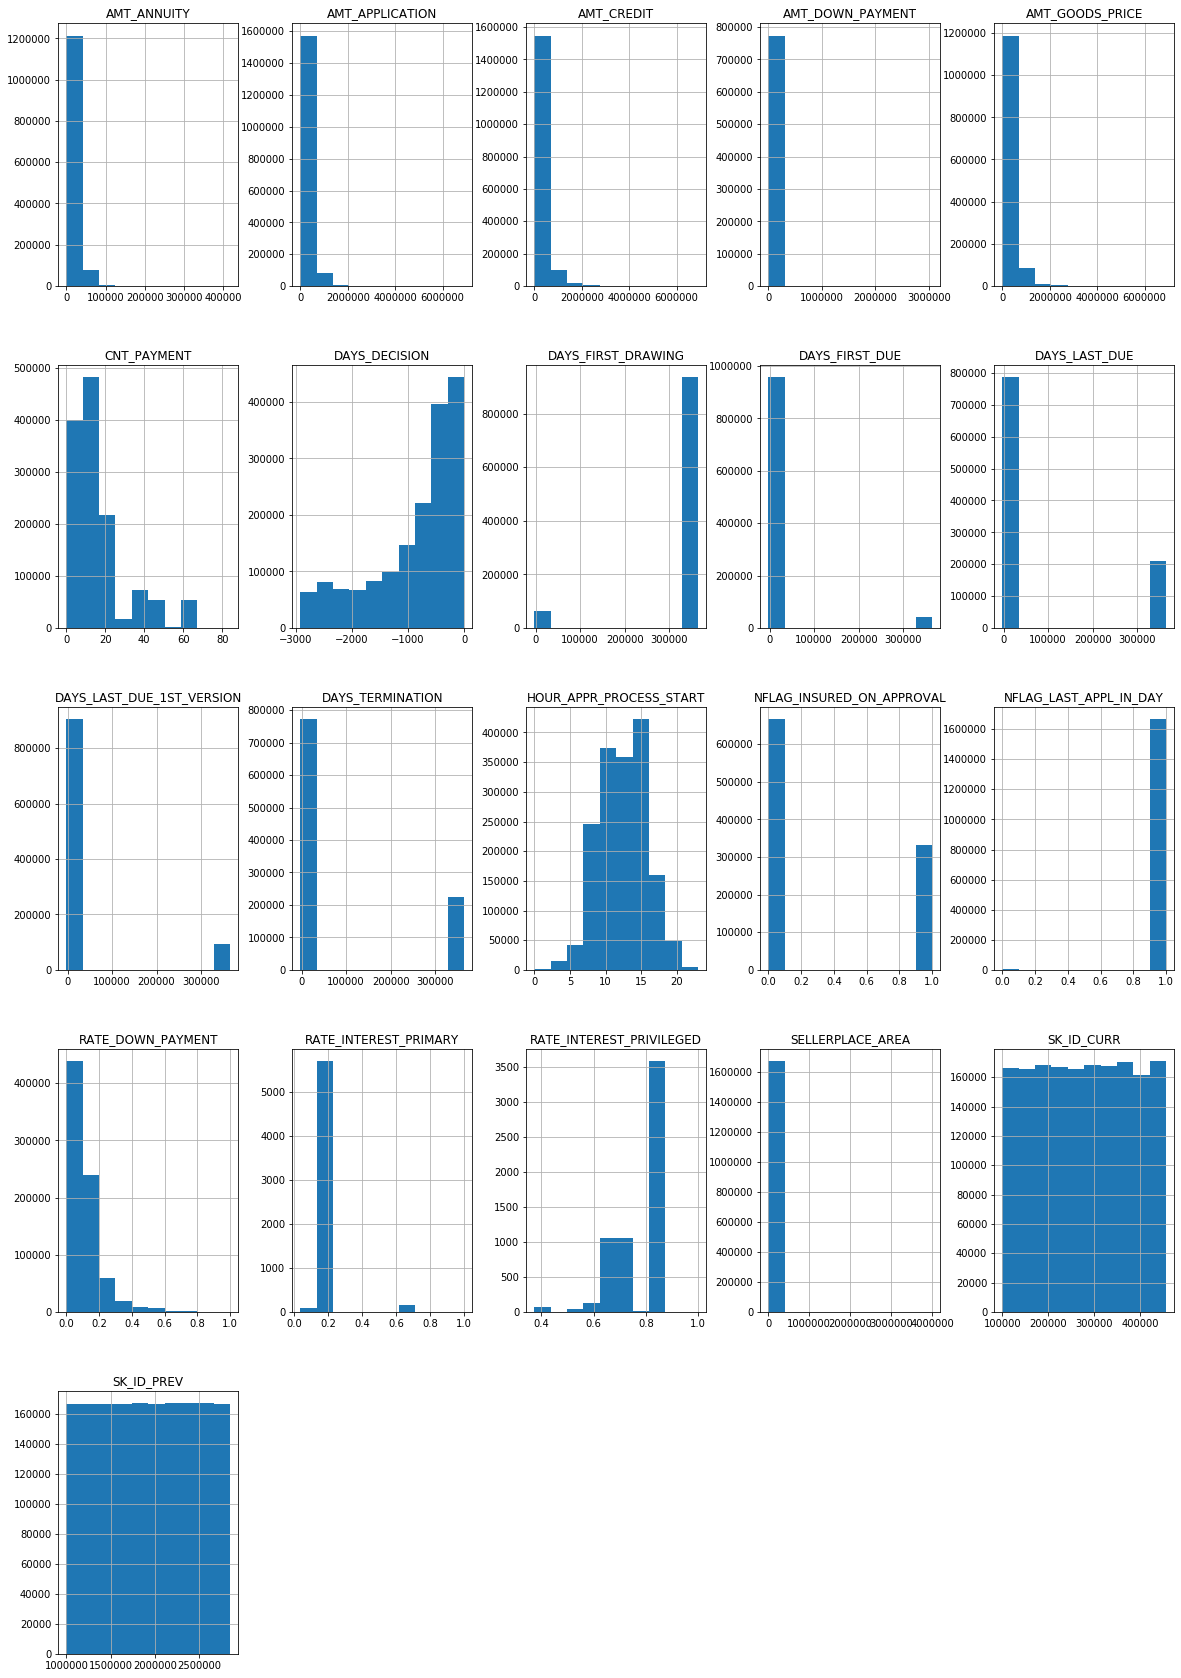

In [8]:
def basic_eda(df, datafile_name="Datafile name"):
    print(f"\n**************************",datafile_name,"******************************\n")
    print(f"Performing basic EDA on {datafile_name} dataset\n")
    print(f"* The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    print("\n* First 10 rows of the dataset:\n")
    display(df.head(10))
    print("\n* Describing the dataset statistics:\n", )
    display(df.describe())
    print("\n* Fetching info of the dataset: \n")
    display(df.info())
    print("\n* Check data distribution: ")
    df.hist(figsize=(20,30))
    
    
df_prev_app = datasets["previous_application"]
basic_eda(df_prev_app, 'previous_applications')

#### SK_ID_PREV and SK_ID_CURR

In [85]:
print("* All records have distinct SK_ID_CURR? \t", len(df_prev_app['SK_ID_CURR'].unique()) == df_prev_app.shape[0])
print("* Total number of unique SK_ID_CURR   : \t", len(df_prev_app['SK_ID_CURR'].unique()))
print("* All records have distinct SK_ID_PREV? \t", len(df_prev_app['SK_ID_PREV'].unique()) == df_prev_app.shape[0])
print("* Total number of unique SK_ID_PREV   : \t", len(df_prev_app['SK_ID_PREV'].unique()))

* All records have distinct SK_ID_CURR? 	 False
* Total number of unique SK_ID_CURR   : 	 338857
* All records have distinct SK_ID_PREV? 	 True
* Total number of unique SK_ID_PREV   : 	 1670214


#### Categorical variables

In [86]:
cat_features = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL']

************************************************** NAME_CONTRACT_TYPE ********************************************** 

NAME_CONTRACT_TYPE	has	0.0% nulls



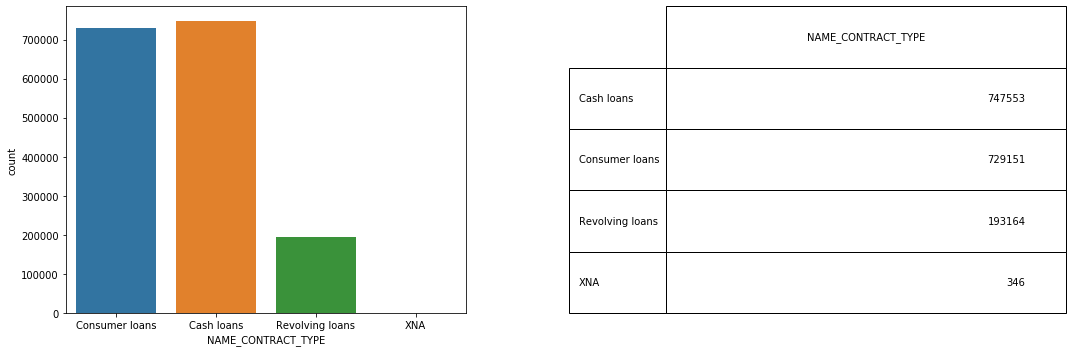

************************************************** WEEKDAY_APPR_PROCESS_START ********************************************** 

WEEKDAY_APPR_PROCESS_START	has	0.0% nulls



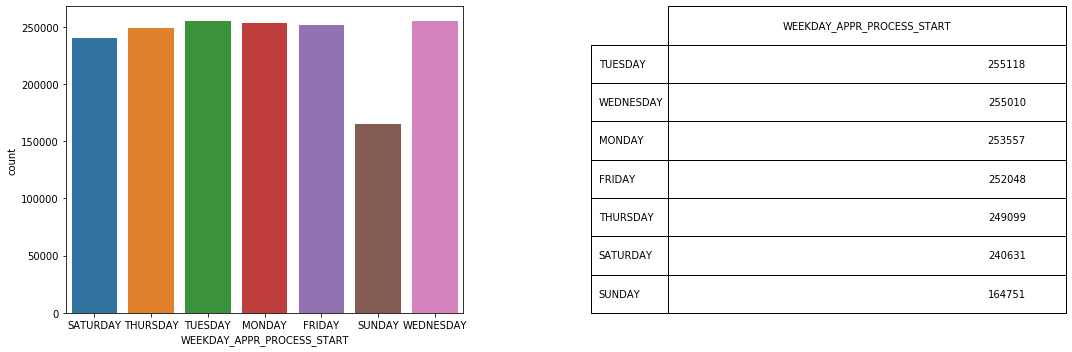

************************************************** HOUR_APPR_PROCESS_START ********************************************** 

HOUR_APPR_PROCESS_START	has	0.0% nulls



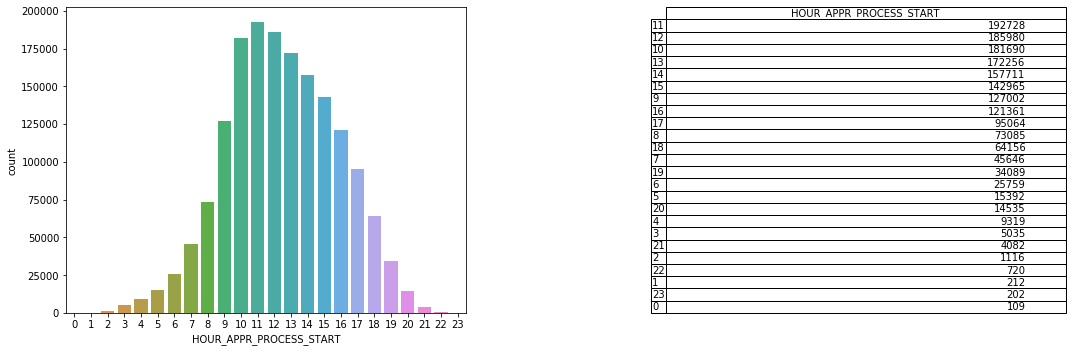

************************************************** NAME_CASH_LOAN_PURPOSE ********************************************** 

NAME_CASH_LOAN_PURPOSE	has	0.0% nulls



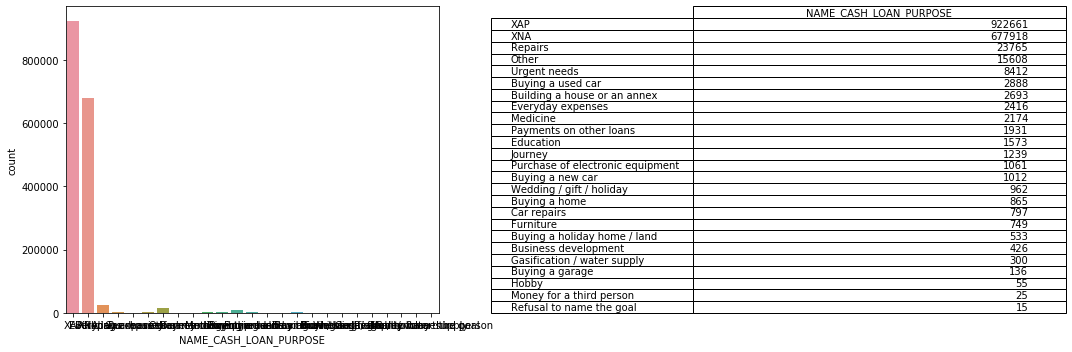

************************************************** NAME_CONTRACT_STATUS ********************************************** 

NAME_CONTRACT_STATUS	has	0.0% nulls



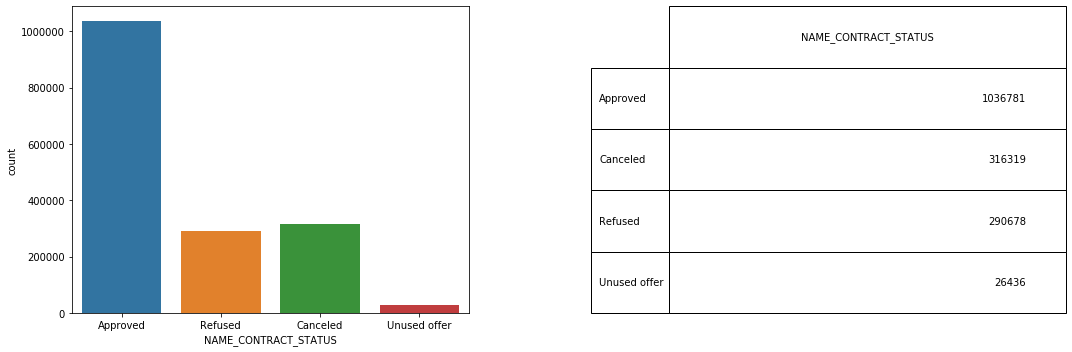

************************************************** NAME_PAYMENT_TYPE ********************************************** 

NAME_PAYMENT_TYPE	has	0.0% nulls



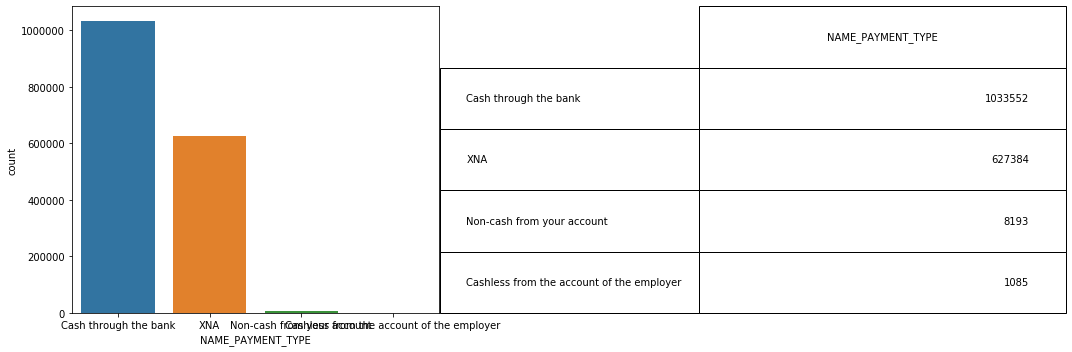

************************************************** CODE_REJECT_REASON ********************************************** 

CODE_REJECT_REASON	has	0.0% nulls



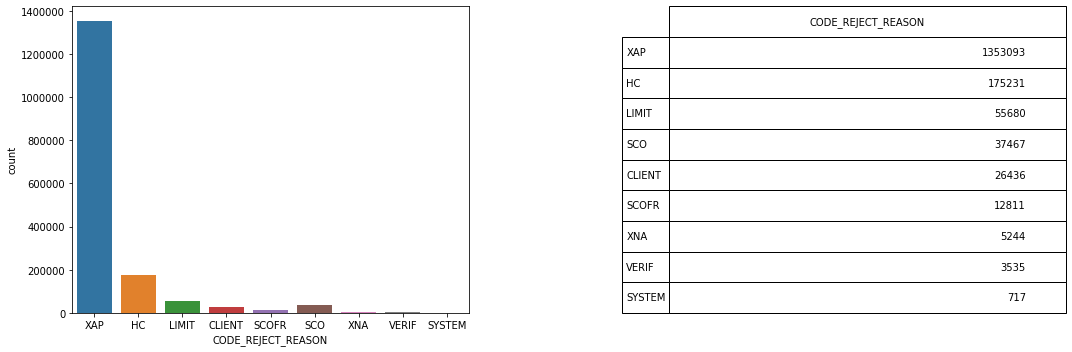

************************************************** NAME_CLIENT_TYPE ********************************************** 

NAME_CLIENT_TYPE	has	0.0% nulls



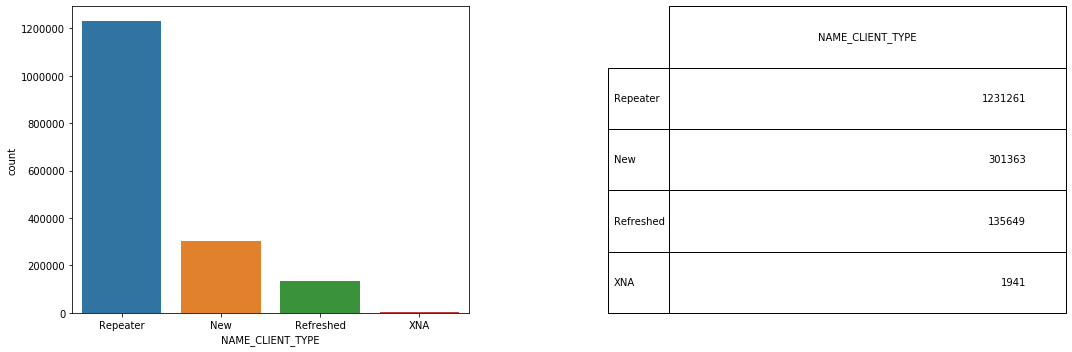

************************************************** NAME_GOODS_CATEGORY ********************************************** 

NAME_GOODS_CATEGORY	has	0.0% nulls



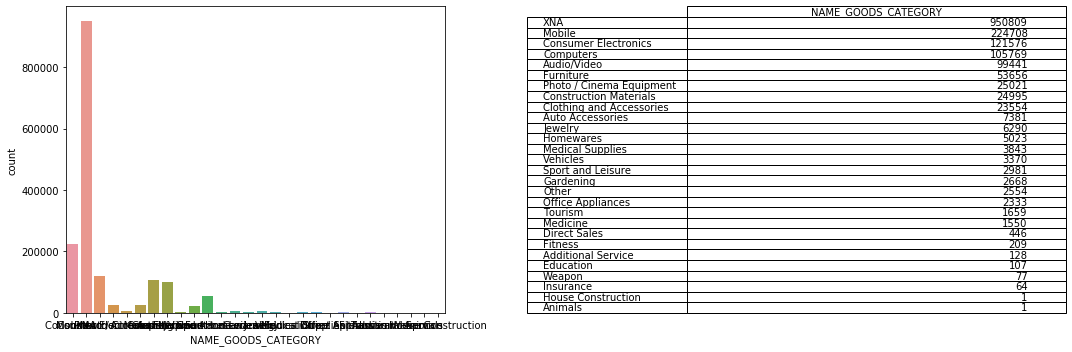

************************************************** CHANNEL_TYPE ********************************************** 

CHANNEL_TYPE	has	0.0% nulls



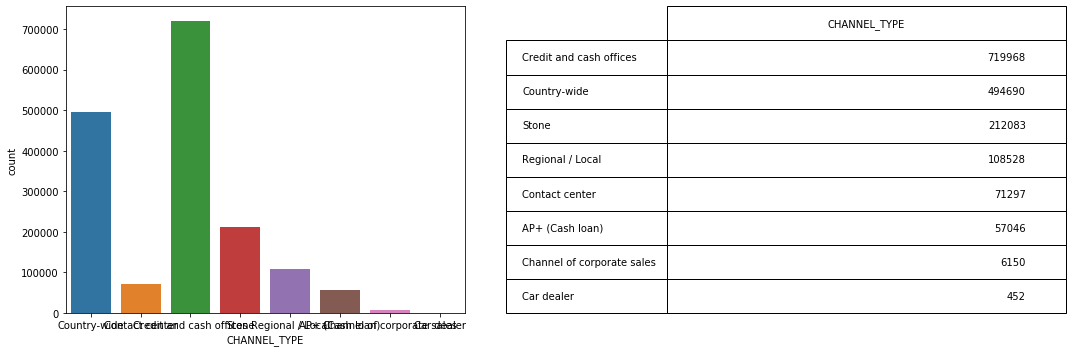

************************************************** NAME_SELLER_INDUSTRY ********************************************** 

NAME_SELLER_INDUSTRY	has	0.0% nulls



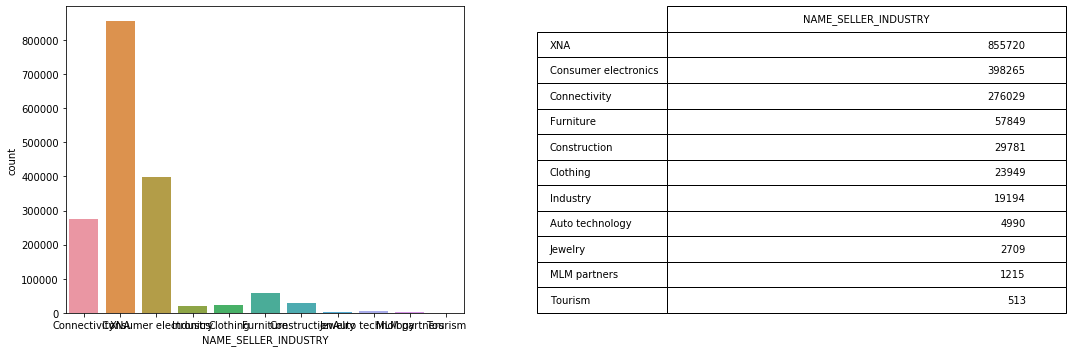

************************************************** PRODUCT_COMBINATION ********************************************** 

PRODUCT_COMBINATION	has	0.02071590826085759% nulls



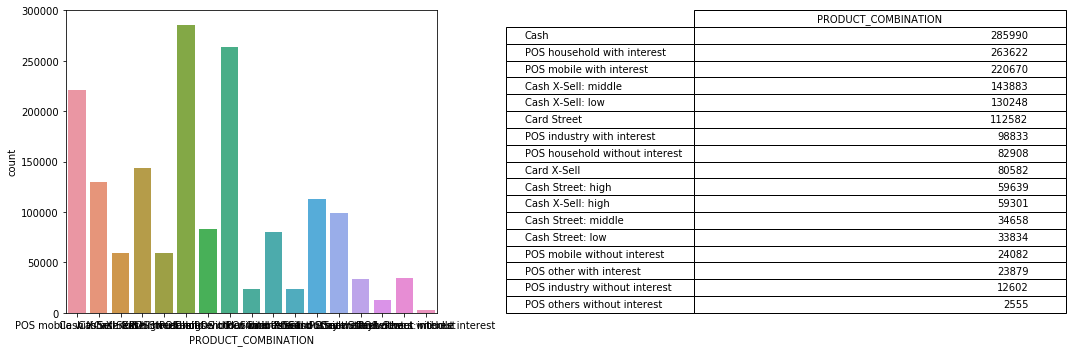

************************************************** NFLAG_INSURED_ON_APPROVAL ********************************************** 

NFLAG_INSURED_ON_APPROVAL	has	40.29812946125467% nulls



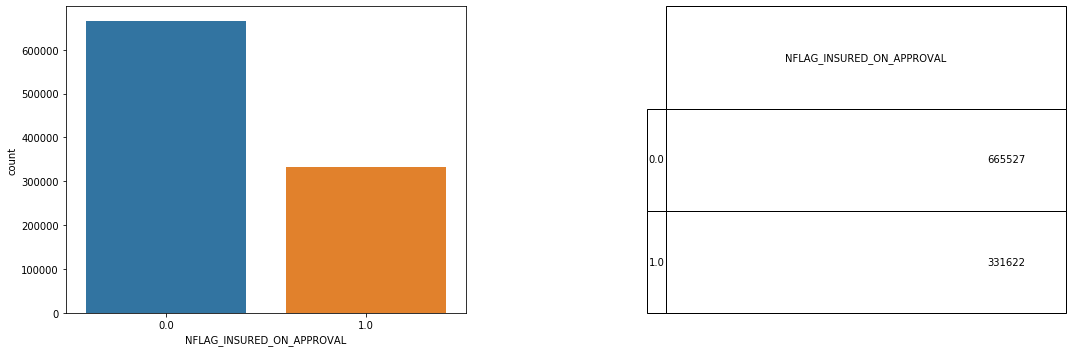

In [87]:
for attr in cat_features:
    print("*"*50, attr, "*"*46, "\n")
    print(f"{attr}\thas\t{(df_prev_app[attr].isna().sum()/ df_prev_app.shape[0])*100}% nulls\n")
    
    y = df_prev_app[attr].value_counts().to_frame()
    
    fig = plt.figure(figsize=(15,5))

    ax1 = fig.add_subplot(121)
    sns.countplot(x=attr, data=df_prev_app)

    ax2 = fig.add_subplot(122)
    font_size=10
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = y.values, rowLabels = y.index, bbox=bbox, colLabels=y.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    plt.tight_layout(w_pad=20)
    plt.show()


In [89]:
percent = (df_prev_app.isnull().sum()/df_prev_app.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = df_prev_app.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
RATE_INTEREST_PRIVILEGED      99.64              1664263
RATE_INTEREST_PRIMARY         99.64              1664263
RATE_DOWN_PAYMENT             53.64               895844
AMT_DOWN_PAYMENT              53.64               895844
NAME_TYPE_SUITE               49.12               820405
DAYS_TERMINATION              40.30               673065
NFLAG_INSURED_ON_APPROVAL     40.30               673065
DAYS_FIRST_DRAWING            40.30               673065
DAYS_FIRST_DUE                40.30               673065
DAYS_LAST_DUE_1ST_VERSION     40.30               673065
DAYS_LAST_DUE                 40.30               673065
AMT_GOODS_PRICE               23.08               385515
AMT_ANNUITY                   22.29               372235
CNT_PAYMENT                   22.29               372230
PRODUCT_COMBINATION            0.02                  346
AMT_CREDIT                     0.00                    1
SK_ID_CURR                     0.00                    0
NAME_CONTRACT_TYPE             0.00                    0
WEEKDAY_APPR_PROCESS_START     0.00                    0
HOUR_APPR_PROCESS_START        0.00                    0

#### Correlation of features

In [90]:
# Dropping columns RATE_INTEREST_PRIVILEGED and RATE_INTEREST_PRIMARY as these have more than 99% data missing
df_prev_app.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis=1, inplace=True)

# Create correlation matrix
corr_matrix = df_prev_app.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Dropping: ", to_drop)
# Drop features 
df_prev_app_new = df_prev_app.drop(df_prev_app[to_drop], axis=1)

df_prev_app_new.head()

Dropping:  ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_TERMINATION']


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_DOWN_PAYMENT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0               0.0                   SATURDAY                       15   
1               NaN                   THURSDAY                       11   
2               NaN                    TUESDAY                       11   
3               NaN                     MONDAY                        7   
4               NaN                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  ...  SELLERPLACE_AREA  \
0                           Y                       1  ...                35   
1                           Y                       1  ...                -1   
2                           Y                       1  ...                -1   
3                           Y                       1  ...                -1   
4                           Y                       1  ...                -1   

  NAME_SELLER_INDUSTRY CNT_PAYMENT  NAME_YIELD_GROUP  \
0         Connectivity        12.0            middle   
1                  XNA        36.0        low_action   
2                  XNA        12.0              high   
3                  XNA        12.0            middle   
4                  XNA        24.0              high   

        PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0  POS mobile with interest           365243.0          -42.0   
1          Cash X-Sell: low           365243.0         -134.0   
2         Cash X-Sell: high           365243.0         -271.0   
3       Cash X-Sell: middle           365243.0         -482.0   
4         Cash Street: high                NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE NFLAG_INSURED_ON_APPROVAL  
0                     300.0         -42.0                       0.0  
1                     916.0      365243.0                       1.0  
2                      59.0      365243.0                       1.0  
3                    -152.0        -182.0                       1.0  
4                       NaN           NaN                       NaN  

[5 rows x 32 columns]

In [122]:
len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))

47800

In [123]:
sum(df_prev_app['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

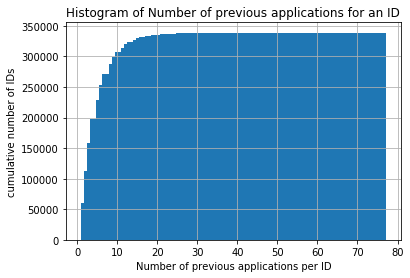

In [124]:
plt.hist(df_prev_app['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [125]:
apps_all = df_prev_app['SK_ID_CURR'].nunique()
apps_5plus = df_prev_app['SK_ID_CURR'].value_counts()>=5
apps_40plus = df_prev_app['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


### Dataset: POS_CASH_BALANCE

Monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.


Table|	Row|	Description|
--------------------|---------------------|:-----------------------------------------------------------------------------------------------------------------------------------------|
POS_CASH_balance.csv|SK_ID_PREV 	      |ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)
POS_CASH_balance.csv|SK_ID_CURR	          |ID of loan in our sample
POS_CASH_balance.csv|MONTHS_BALANCE	      |Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )
POS_CASH_balance.csv|CNT_INSTALMENT	      |Term of previous credit (can change over time)
POS_CASH_balance.csv|CNT_INSTALMENT_FUTURE|Installments left to pay on the previous credit
POS_CASH_balance.csv|NAME_CONTRACT_STATUS |Contract status during the month
POS_CASH_balance.csv|SK_DPD	              |DPD (days past due) during the month of previous credit
POS_CASH_balance.csv|SK_DPD_DEF	          |DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit



************************** POS_CASH_balance ******************************

Performing basic EDA on POS_CASH_balance dataset

* The dataset has 10001358 rows and 8 columns.

* First 10 rows of the dataset:



SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   
5     2207092      342166             -32            12.0   
6     1110516      204376             -38            48.0   
7     1387235      153211             -35            36.0   
8     1220500      112740             -31            12.0   
9     2371489      274851             -32            24.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0  
5                   12.0               Active       0           0  
6                   43.0               Active       0           0  
7                   36.0               Active       0           0  
8                   12.0               Active       0           0  
9                   16.0               Active       0           0


* Describing the dataset statistics:



SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000e+00  0.000000e+00  0.000000e+00  
75%             1.400000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  4.231000e+03  3.595000e+03


* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               int64
SK_ID_CURR               int64
MONTHS_BALANCE           int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS     object
SK_DPD                   int64
SK_DPD_DEF               int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


None


* Check data distribution: 


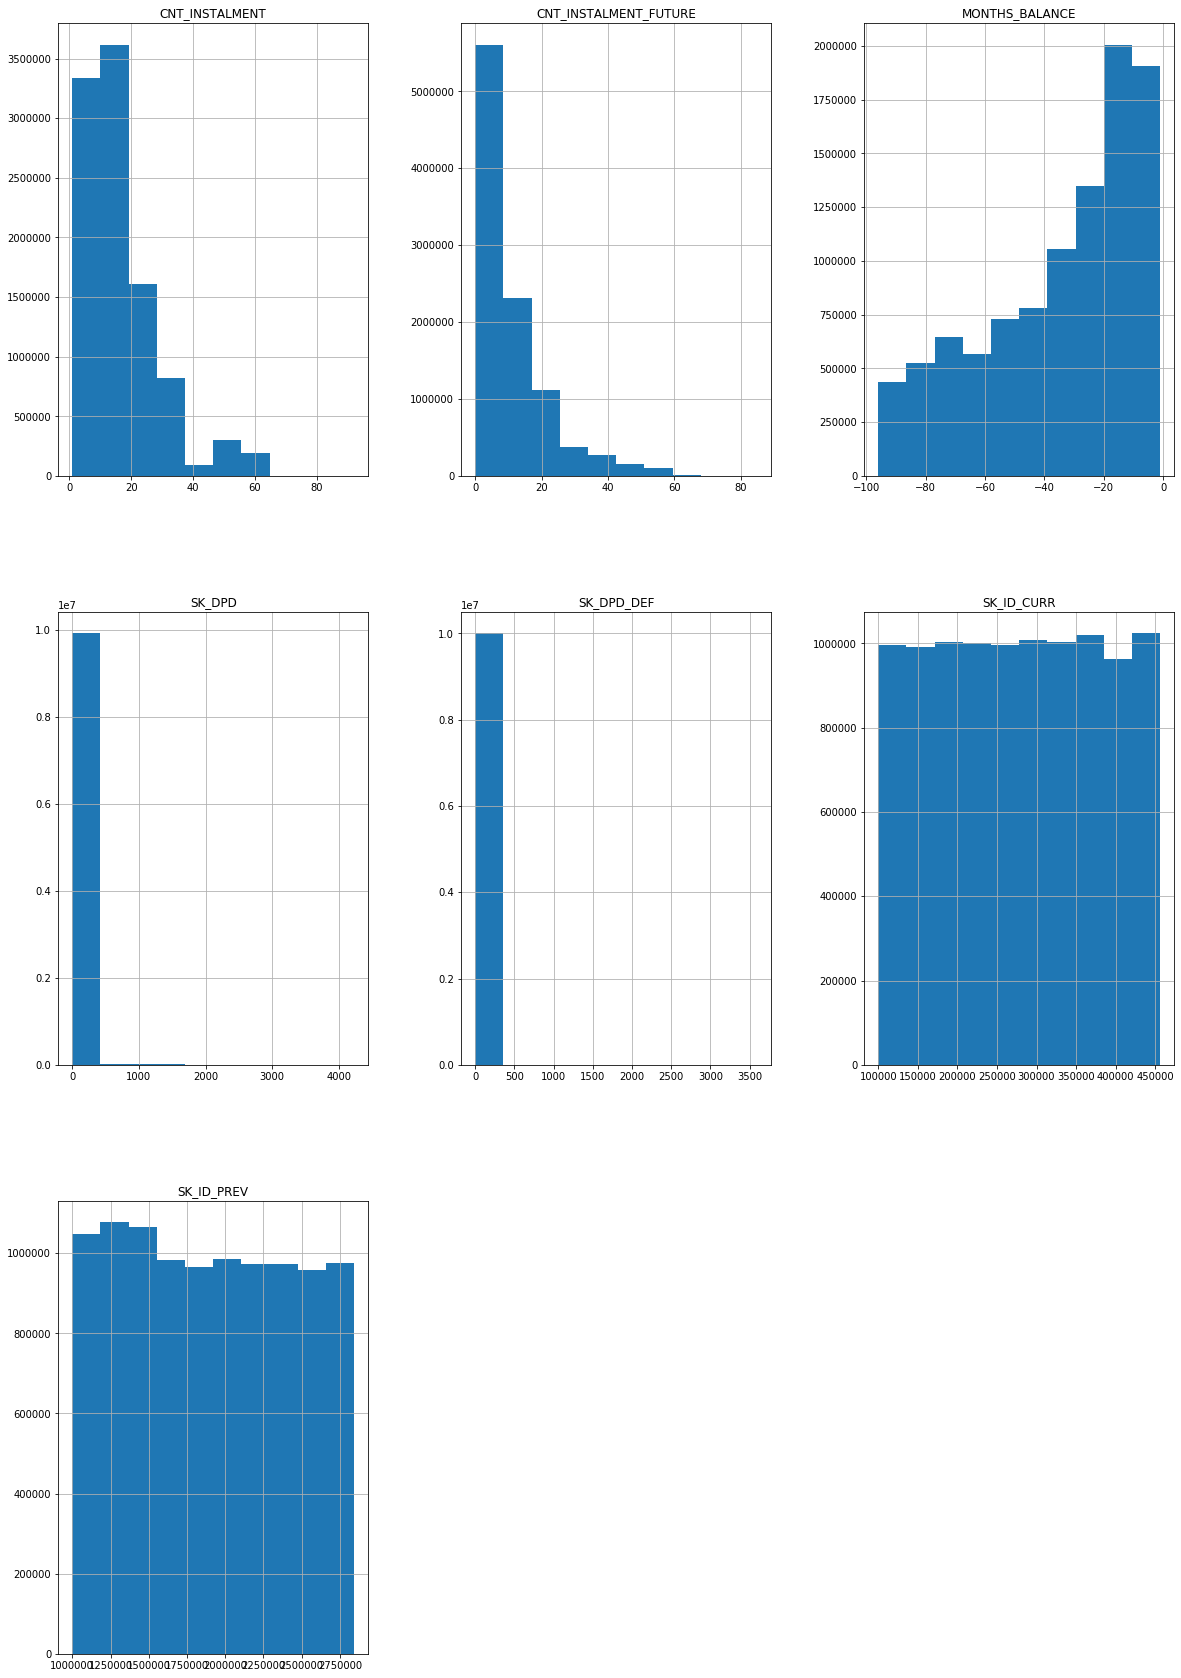

In [93]:
df_pos_cash = datasets['POS_CASH_balance']
basic_eda(df_pos_cash, 'POS_CASH_balance')

#### SK_DPD and SK_DPD_DEF

In [94]:
print("* Values of SK_DPD\n")
# display(df_pos_cash['SK_DPD'].value_counts())
display(df_pos_cash['SK_DPD'].groupby(pd.cut(df_pos_cash['SK_DPD'],[0,100,200,500,1000,2000,5000])).count())

print("* Values of SK_DPD_DEF\n")
# display(df_pos_cash['SK_DPD_DEF'].value_counts())
display(df_pos_cash['SK_DPD_DEF'].groupby(pd.cut(df_pos_cash['SK_DPD_DEF'],[0,100,200,500,1000,2000,5000])).count())

# display(df_pos_cash[df_pos_cash['SK_DPD']==4231])
# display(df_pos_cash[df_pos_cash['SK_DPD_DEF']==3595])

* Values of SK_DPD



SK_DPD
(0, 100]        177723
(100, 200]       13456
(200, 500]       28144
(500, 1000]      30111
(1000, 2000]     31903
(2000, 5000]     13890
Name: SK_DPD, dtype: int64

* Values of SK_DPD_DEF



SK_DPD_DEF
(0, 100]        109343
(100, 200]         356
(200, 500]         734
(500, 1000]       1070
(1000, 2000]      1402
(2000, 5000]      1064
Name: SK_DPD_DEF, dtype: int64

Text(0.5, 1.0, 'Distribution of SK_DPD_DEF')

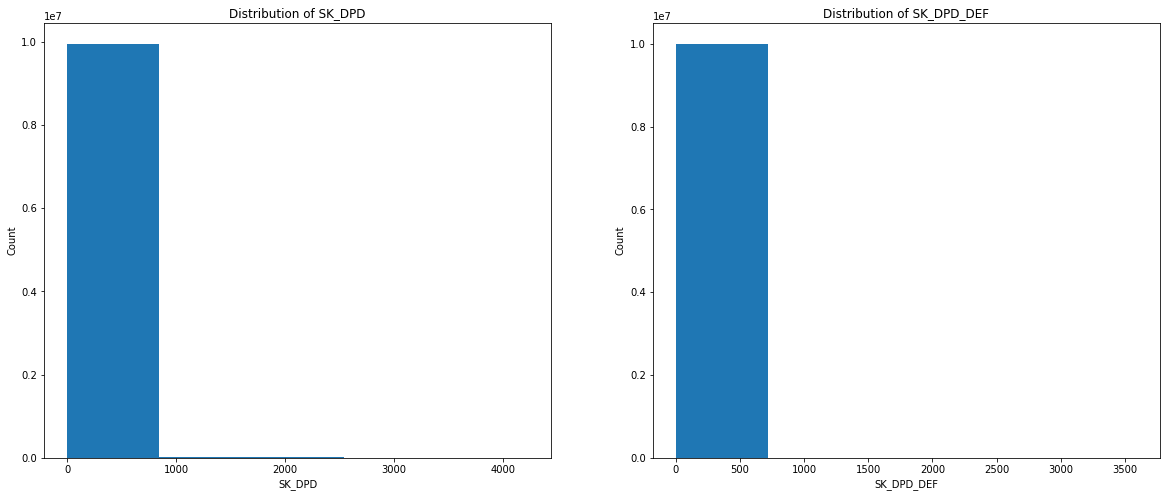

In [95]:
plt.figure(figsize=(20,8))
plt.subplot(121)
_ = plt.hist(df_pos_cash['SK_DPD'], bins=5)
plt.xlabel("SK_DPD")
plt.ylabel("Count")
plt.title("Distribution of SK_DPD")
plt.subplot(122)
_ = plt.hist(df_pos_cash['SK_DPD_DEF'], bins=5)
plt.xlabel("SK_DPD_DEF")
plt.ylabel("Count")
plt.title("Distribution of SK_DPD_DEF")

In [96]:
print(f"* SK_DPD and SK_DPD_DEF are different for {len(df_pos_cash[df_pos_cash.SK_DPD != df_pos_cash.SK_DPD_DEF])} records")

* SK_DPD and SK_DPD_DEF are different for 183880 records


#### NAME_CONTRACT_STATUS

In [97]:
# This gives us latest record of each loan
# MONTHS_BALANCE has 0 for current, -1 for previous etc.
# Value of -8 in this field means 8 months back the loan was completed.

df_pos_cash_latest = df_pos_cash.loc[df_pos_cash.groupby(['SK_ID_PREV','SK_ID_CURR'])['MONTHS_BALANCE'].idxmax()]   

df_pos_cash_latest.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
45995       1000001      158271              -8             2.0   
2792302     1000002      101962             -50             4.0   
7085917     1000003      252457              -1            12.0   
4078063     1000004      260094             -22             7.0   
7852623     1000005      176456             -46            10.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
45995                      0.0            Completed       0           0  
2792302                    0.0            Completed       0           0  
7085917                    9.0               Active       0           0  
4078063                    0.0            Completed       0           0  
7852623                    0.0            Completed       0           0

In [98]:
df_pos_cash_latest['NAME_CONTRACT_STATUS'].value_counts()

Completed                698421
Active                   236149
Signed                     1272
Returned to the store       304
Demand                      102
Approved                     58
Amortized debt               17
Canceled                      2
Name: NAME_CONTRACT_STATUS, dtype: int64

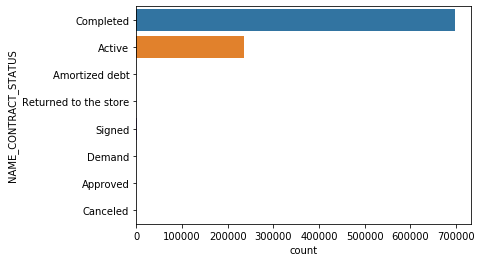

In [99]:
sns.countplot(y='NAME_CONTRACT_STATUS', data=df_pos_cash_latest)

### Dataset: Bureau


************************** bureau ******************************

Performing basic EDA on bureau dataset

* The dataset has 1716428 rows and 17 columns.

* First 10 rows of the dataset:



SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   
5      215354       5714467        Active      currency 1         -273   
6      215354       5714468        Active      currency 1          -43   
7      162297       5714469        Closed      currency 1        -1896   
8      162297       5714470        Closed      currency 1        -1146   
9      162297       5714471        Active      currency 1        -1146   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   
5                   0              27460.0                NaN   
6                   0                 79.0                NaN   
7                   0              -1684.0            -1710.0   
8                   0               -811.0             -840.0   
9                   0               -484.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0        91323.00   
1                     NaN                   0       225000.00   
2                     NaN                   0       464323.50   
3                     NaN                   0        90000.00   
4                 77674.5                   0      2700000.00   
5                     0.0                   0       180000.00   
6                     0.0                   0        42103.80   
7                 14985.0                   0        76878.45   
8                     0.0                   0       103007.70   
9                     0.0                   0         4500.00   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                 0.00                   NaN                     0.0   
1            171342.00                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   
5             71017.38             108982.62                     0.0   
6             42103.80                  0.00                     0.0   
7                 0.00                  0.00                     0.0   
8                 0.00                  0.00                     0.0   
9                 0.00                  0.00                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN  
5      Credit card                 -31          NaN  
6  Consumer credit                 -22          NaN  
7  Consumer credit               -1710          NaN  
8  Consumer credit                -840          NaN  
9      Credit card                -690          NaN


* Describing the dataset statistics:



SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08


* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


None


* Check data distribution: 


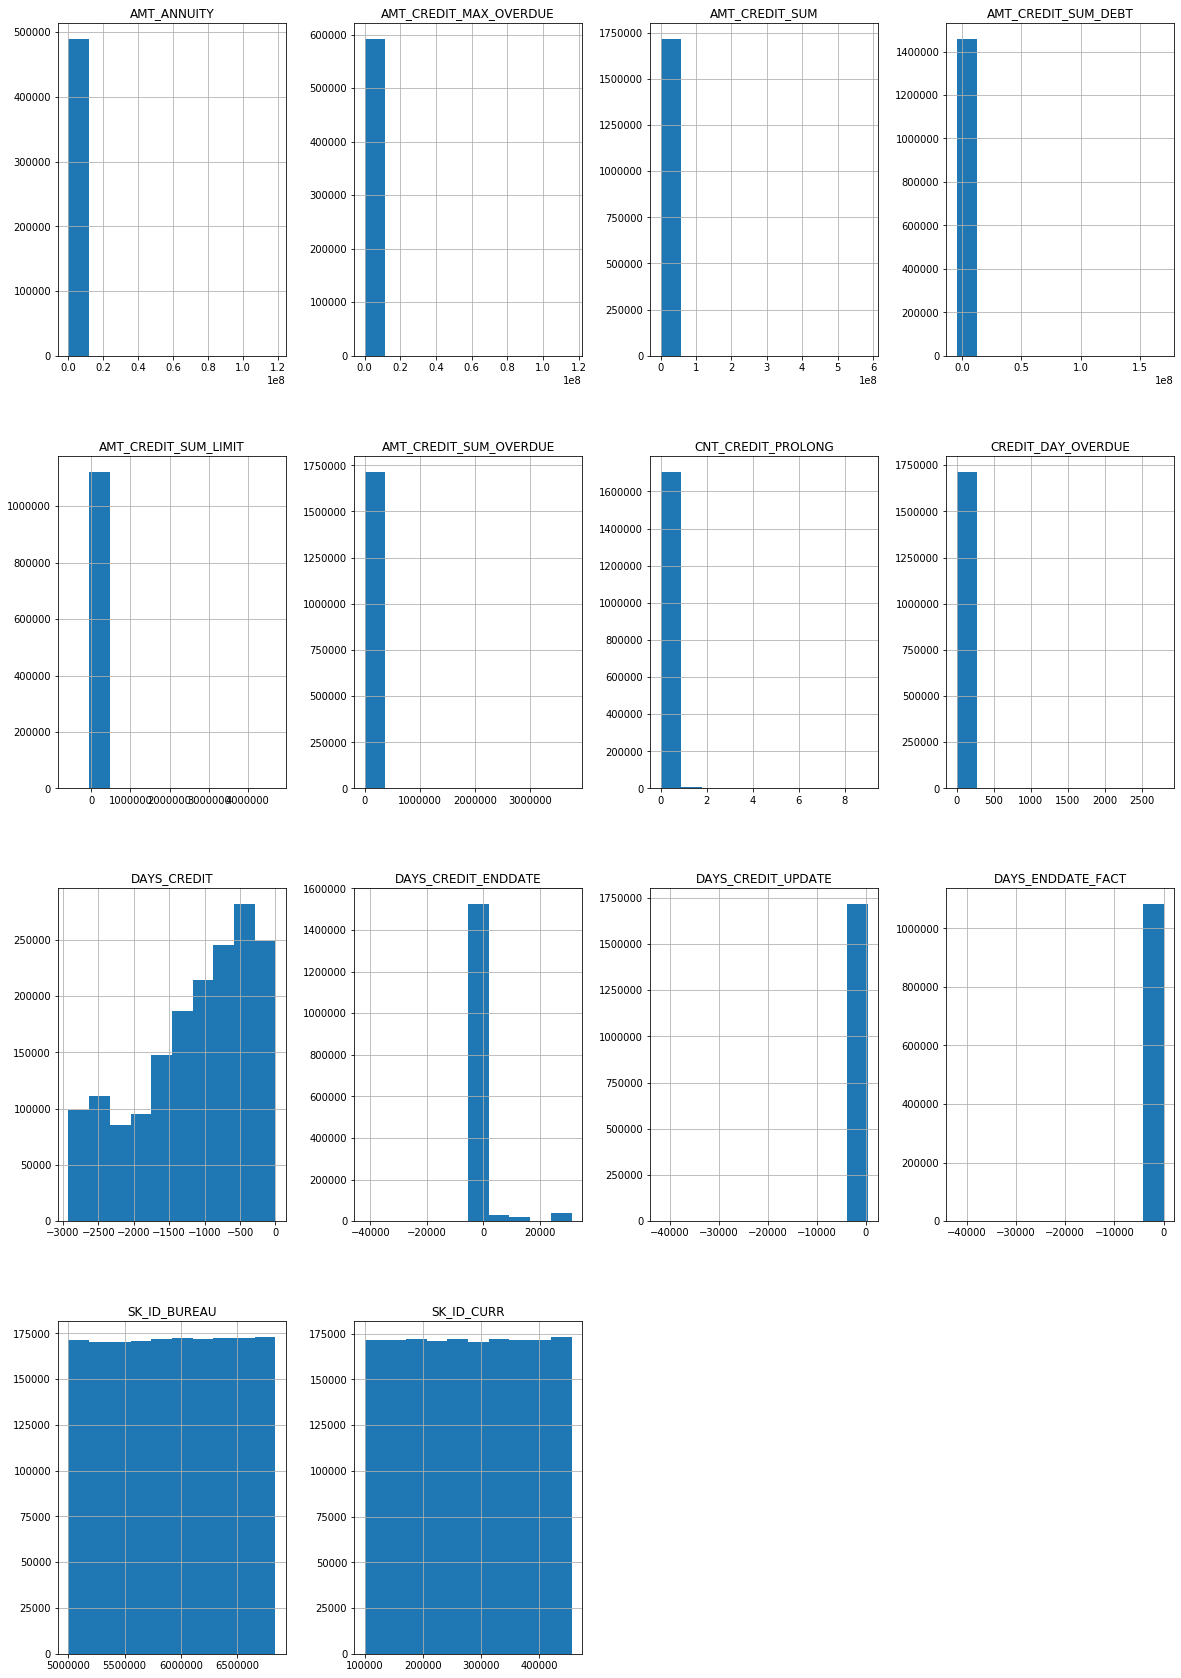

In [100]:
bureau_df = datasets['bureau']
basic_eda(bureau_df, 'bureau')

In [127]:
# Number of unqiue SK_IDs
len(bureau_df['SK_ID_CURR'].unique())

305811

In [128]:
cat_features = ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

************************************************** CREDIT_ACTIVE ********************************************** 

CREDIT_ACTIVE	has	0.0% nulls



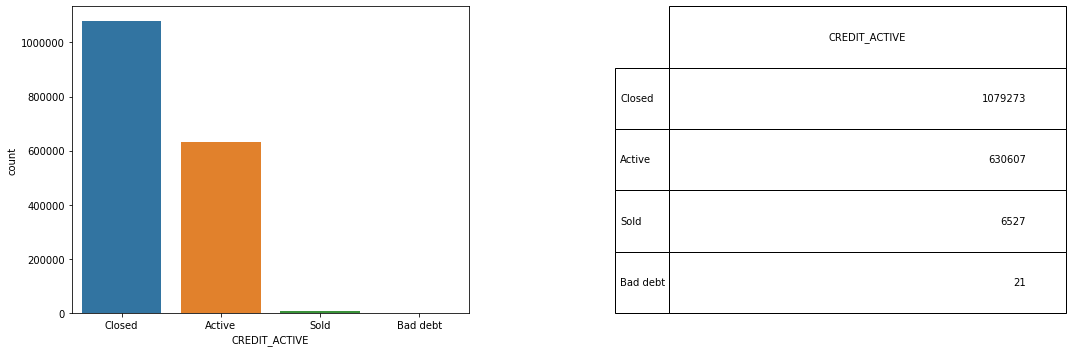

************************************************** CREDIT_CURRENCY ********************************************** 

CREDIT_CURRENCY	has	0.0% nulls



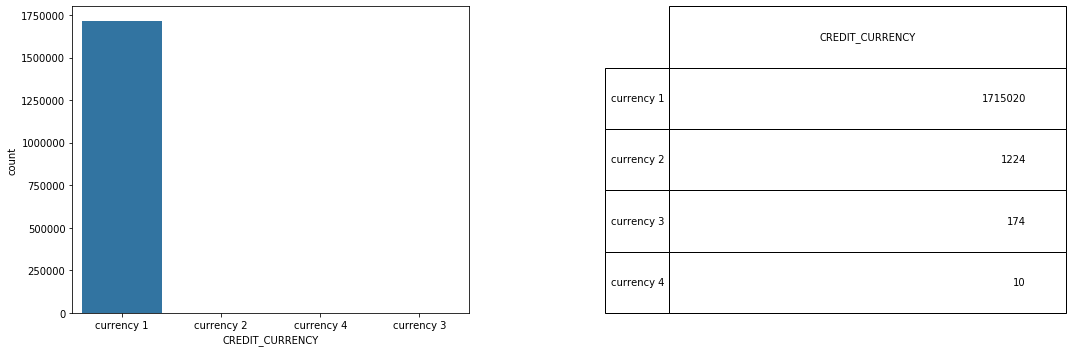

************************************************** CREDIT_TYPE ********************************************** 

CREDIT_TYPE	has	0.0% nulls



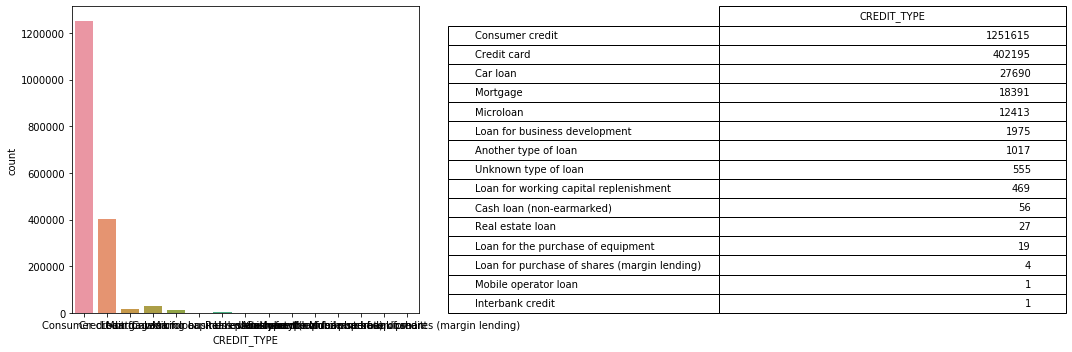

In [129]:
for attr in cat_features:
    print("*"*50, attr, "*"*46, "\n")
    print(f"{attr}\thas\t{(bureau_df[attr].isna().sum()/ bureau_df.shape[0])*100}% nulls\n")
    
    y = bureau_df[attr].value_counts().to_frame()
    
    fig = plt.figure(figsize=(15,5))

    ax1 = fig.add_subplot(121)
    sns.countplot(x=attr, data=bureau_df)

    ax2 = fig.add_subplot(122)
    font_size=10
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = y.values, rowLabels = y.index, bbox=bbox, colLabels=y.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    plt.tight_layout(w_pad=20)
    plt.show()

In [114]:
bureau_df.groupby('SK_ID_CURR').sum()['AMT_CREDIT_SUM_DEBT'].describe()

count    3.058110e+05
mean     6.539142e+05
std      1.640691e+06
min     -6.981558e+06
25%      0.000000e+00
50%      1.733670e+05
75%      6.765412e+05
max      3.344983e+08
Name: AMT_CREDIT_SUM_DEBT, dtype: float64

### Dataset: credit_card_balance


************************** credit_card_balance ******************************

Performing basic EDA on credit_card_balance dataset

* The dataset has 3840312 rows and 23 columns.

* First 10 rows of the dataset:



SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   
5     2646502      380010              -7    82903.815   
6     1079071      171320              -6   353451.645   
7     2095912      118650              -7    47962.125   
8     2181852      367360              -4   291543.075   
9     1235299      203885              -5   201261.195   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0               877.500   
1                    45000                    2250.0              2250.000   
2                   450000                       0.0                 0.000   
3                   225000                    2250.0              2250.000   
4                   450000                       0.0             11547.000   
5                   270000                       0.0                 0.000   
6                   585000                   67500.0             67500.000   
7                    45000                   45000.0             45000.000   
8                   292500                   90000.0            289339.425   
9                   225000                   76500.0            111026.700   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                   877.500   
1                         0.0                     0.000   
2                         0.0                     0.000   
3                         0.0                     0.000   
4                         0.0                 11547.000   
5                         0.0                     0.000   
6                         0.0                     0.000   
7                         0.0                     0.000   
8                         0.0                199339.425   
9                         0.0                 34526.700   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   
5                 4449.105  ...      82773.315             82773.315   
6                14684.175  ...     351881.145            351881.145   
7                    0.000  ...      47962.125             47962.125   
8                  130.500  ...     286831.575            286831.575   
9                 6338.340  ...     197224.695            197224.695   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   
5                       0.0                     0                         0.0   
6                       1.0                     1                         0.0   
7                       1.0                     1                         0.0   
8                       3.0                     8                         0.0   
9                       3.0                     9                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1         


* Describing the dataset statistics:



SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433388e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  \
count              3.090496e+06             3.535076e+06  ...   
mean               2.968805e+03             3.540204e+03  ...   
std                2.079689e+04             5.600154e+03  ...   
min                0.000000e+00             0.000000e+00  ...   
25%                0.000000e+00             0.000000e+00  ...   
50%                0.000000e+00             0.000000e+00  ...   
75%                0.000000e+00             6.633911e+03  ...   
max                2.239274e+06             2.028820e+05  ...   

       AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
count              3.840312e+06   3.840312e+06          3.840312e+06   
mean               5.596588e+04   5.808881e+04          5.809829e+04   
std                1.025336e+05   1.059654e+05          1.059718e+05   
min               -4.233058e+05  -4.202502e+05         -4.202502e+05   
25%                0.000000e+00   0.000000e+00          0.000000e+00   
50%                0.000000e+00   0.000000e+00          0.000000e+00   
75%                8.535924e+04   8.889949e+04          8.891451e+04   
max                1.472317e+06   1.493338e+06          1.493338e+06   

       CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count              3.090496e+06          3.840312e+06   
mean               3.094490e-01          7.031439e-01   
std                1.100401e+00          3.190347e+00   
min                0.000000e+00          0.000000e+00   
25%                0.000000e+00          0.000000e+00   
50%                0.000000e+00          0.000000e+00   
75%                0.000000e+00          0.000000e+00   
max                5.100000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                3.090496e+06              3.090496e+06   
mean                 4.812496e-03              5.594791e-01   
std                  8.263861e-02              3.240649e+00   
min                  0.000000e+00              0.000000e+00   
25%                  0.000000e+00              0.000000e+00   
50%                  0.000000e+00              0.000000e+00   
75%                  0.000000e+00              0.000000e+00   
max                  1.200000e+01              1.650000e+02   

       CNT_INST


* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF                   

None


* Check data distribution: 


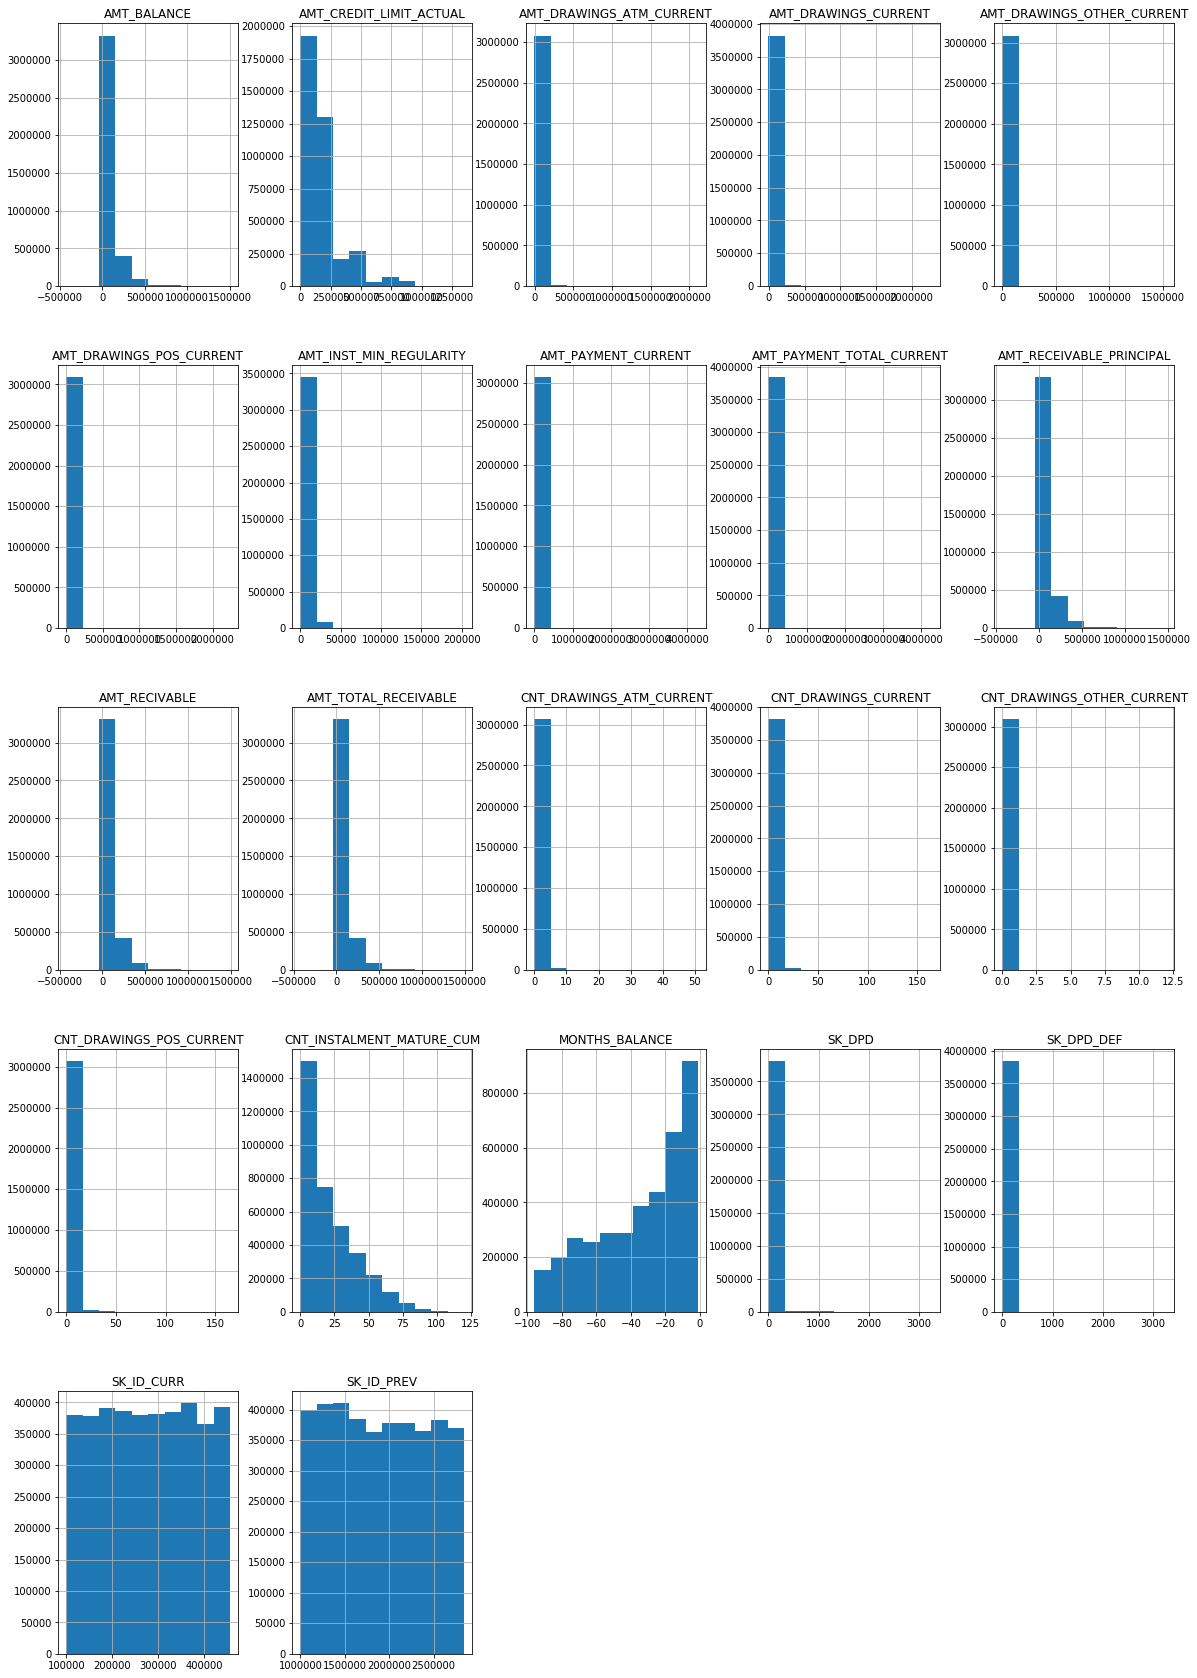

In [9]:
df_credit = datasets['credit_card_balance']
basic_eda(df_credit, 'credit_card_balance')

#### SK_ID_PREV and SK_ID_CURR

In [10]:
print("* All records have distinct SK_ID_CURR? \t", len(df_credit['SK_ID_CURR'].unique()) == df_credit.shape[0])
print("* Total number of unique SK_ID_CURR   : \t", len(df_credit['SK_ID_CURR'].unique()))
print("* All records have distinct SK_ID_PREV? \t", len(df_credit['SK_ID_PREV'].unique()) == df_credit.shape[0])
print("* Total number of unique SK_ID_PREV   : \t", len(df_credit['SK_ID_PREV'].unique()))

* All records have distinct SK_ID_CURR? 	 False
* Total number of unique SK_ID_CURR   : 	 103558
* All records have distinct SK_ID_PREV? 	 False
* Total number of unique SK_ID_PREV   : 	 104307


#### SK_DPD and SK_DPD_DEF

In [11]:
print("* Values of SK_DPD\n")
# display(df_credit['SK_DPD'].value_counts())
display(df_credit['SK_DPD'].groupby(pd.cut(df_credit['SK_DPD'],[0,100,200,500,1000,2000,5000])).count())

print("* Values of SK_DPD_DEF\n")
# display(df_credit['SK_DPD_DEF'].value_counts())
display(df_credit['SK_DPD_DEF'].groupby(pd.cut(df_credit['SK_DPD_DEF'],[0,100,200,500,1000,2000,5000])).count())

* Values of SK_DPD



SK_DPD
(0, 100]        106769
(100, 200]        4915
(200, 500]       12673
(500, 1000]      15095
(1000, 2000]     13447
(2000, 5000]       456
Name: SK_DPD, dtype: int64

* Values of SK_DPD_DEF



SK_DPD_DEF
(0, 100]        88307
(100, 200]        113
(200, 500]        172
(500, 1000]       240
(1000, 2000]      354
(2000, 5000]      154
Name: SK_DPD_DEF, dtype: int64

Text(0.5, 1.0, 'Distribution of SK_DPD_DEF')

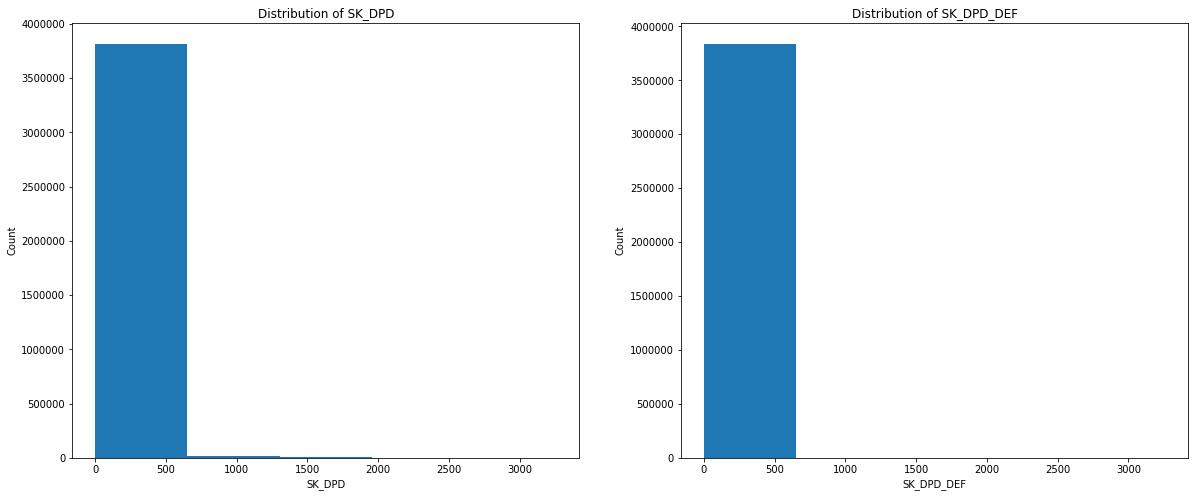

In [12]:
plt.figure(figsize=(20,8))
plt.subplot(121)
_ = plt.hist(df_credit['SK_DPD'], bins=5)
plt.xlabel("SK_DPD")
plt.ylabel("Count")
plt.title("Distribution of SK_DPD")
plt.subplot(122)
_ = plt.hist(df_credit['SK_DPD_DEF'], bins=5)
plt.xlabel("SK_DPD_DEF")
plt.ylabel("Count")
plt.title("Distribution of SK_DPD_DEF")

In [13]:
print(f"* SK_DPD and SK_DPD_DEF are different for {len(df_credit[df_credit.SK_DPD != df_credit.SK_DPD_DEF])} records")
# We will use the the SK_PDP for evaluating how many DPD (Days past due) during the month on the previous credit since the amount is larger

* SK_DPD and SK_DPD_DEF are different for 64439 records


#### NAME_CONTRACT_STATUS

In [14]:
df_credit['NAME_CONTRACT_STATUS'].value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

Text(0.5, 1.0, 'Distribution of the previous loan statuses')

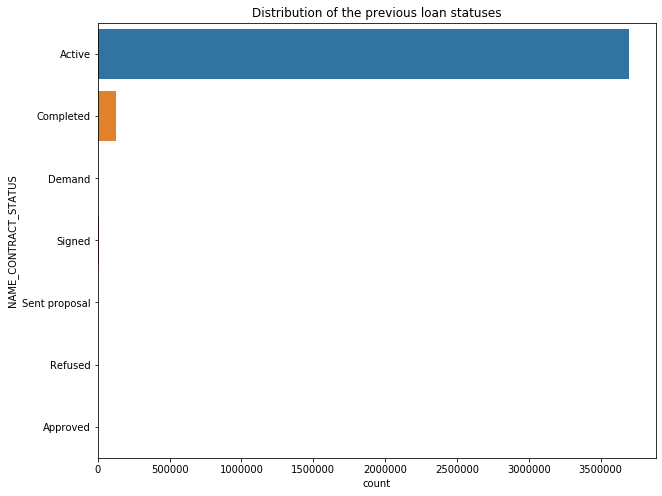

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(y='NAME_CONTRACT_STATUS', data=df_credit)
plt.title("Distribution of the previous loan statuses")

### Dataset: installments_payments

In [ ]:
df_credit = datasets['installments_payments']
basic_eda(df_credit, 'credit_card_balance')

#### SK_ID_PREV and SK_ID_CURR

In [ ]:
print("* All records have distinct SK_ID_CURR? \t", len(df_installments['SK_ID_CURR'].unique()) == df_installments.shape[0])
print("* Total number of unique SK_ID_CURR   : \t", len(df_installments['SK_ID_CURR'].unique()))
print("* All records have distinct SK_ID_PREV? \t", len(df_installments['SK_ID_PREV'].unique()) == df_installments.shape[0])
print("* Total number of unique SK_ID_PREV   : \t", len(df_installments['SK_ID_PREV'].unique()))

# Dataset questions
## Unique record for each SK_ID_CURR

In [117]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [118]:
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [119]:
datasets["application_test"].shape

(48744, 121)

In [120]:
datasets["application_train"].shape

(307511, 123)

# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


## Feature engineering

### New features planned

* POS_CASH_balance
    - How many installments are not yet paid (CNT_INSTALMENT_FUTURE) 
    - Total number of previous loans
    - Total number of previous loans per status
    - Min and max terms of previous loans  
  
* credit_card_balance
    - Average Monthly Balance per previous loans
    - Average Credit Card Limit per previous loans
    - Average Monthly Payments per previous loans
    - The percentage of over due payments per previous loans  
    
* installments_payments    
    - Payment_Days_over_installments
    - Payment_Amount_over_installments    

### Dictionary for out datasets

In [2]:
final_ds_names = ("bureau_final","bureau_balance_final","credit_card_balance_final","installments_payments_final",
            "previous_application_final","POS_CASH_balance_fianl")

final_ds = dict()

### DATASET: POS_CASH_balance

#### OHE on latest value of NAME_CONTRACT_STATUS

In [ ]:
df_pos_cash_latest_status = df_pos_cash_latest[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_STATUS']]
df_pos_cash_latest_status.head()

df_dummies = df_pos_cash_latest_status['NAME_CONTRACT_STATUS'].str.get_dummies()
df_dummies.head()

df_pos_cash_latest_status = pd.concat([df_pos_cash_latest_status,df_dummies] , axis=1, sort=False)
df_pos_cash_latest_status.head()

#### Group by 'SK_ID_CURR' and 'SK_ID_PREV'

In [ ]:
d = {
    'SK_ID_PREV':['size'],
    'CNT_INSTALMENT_FUTURE':['min'],
    'CNT_INSTALMENT':['max']
    
}
df_agg = df_pos_cash.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg(d)
# display(df_agg.head())

df_agg.columns = df_agg.columns.droplevel()
# display(df_agg.head())
df_agg.reset_index(inplace=True)
# display(df_agg.head())
df_agg.columns=['SK_ID_CURR','SK_ID_PREV','Count','Remaining_repays','Initial_term']
display(df_agg.head())

#### Add current statuses

In [ ]:
df_final = pd.merge(df_agg,df_pos_cash_latest_status,how='left')

In [ ]:
df_final.info()

In [ ]:
df_final.head()

#### Group by SK_ID_CURR

In [ ]:

d2 = {
    'SK_ID_PREV':['size'],
    'Remaining_repays':['sum'],
    'Initial_term': ['min','max'],
    'Active':['sum'],
    'Amortized debt':['sum'],
    'Approved':['sum'],
    'Canceled':['sum'],
    'Completed':['sum'],
    'Demand':['sum'],
    'Returned to the store':['sum'],
    'Signed':['sum']
}
df_out = df_final.groupby('SK_ID_CURR').agg(d2)

# display(df_out.head())

df_out.columns = df_out.columns.droplevel()

df_out.reset_index(inplace=True)

df_out.columns=['SK_ID_CURR','Count','Total_Remaining_repays','Min_Initial_term','Max_Initial_term','Active','Amortized debt','Approved','Canceled','Completed','Demand','Returned to the store','Signed']
display(df_out.head())

In [ ]:
final_ds['POS_CASH_balance_fianl'] = df_out

### DATASET: previous_application

In [ ]:
d = {
 'Cash loans'     : ['sum'],
 'Consumer loans' : ['sum'],
 'Revolving loans': ['sum'],
 'XNA'            : ['sum'],
 'FRIDAY'         : ['sum'],
 'MONDAY'         : ['sum'],
 'SATURDAY'       : ['sum'],
 'SUNDAY'         : ['sum'],
 'THURSDAY'       : ['sum'],
 'TUESDAY'        : ['sum'],
 'WEDNESDAY'      : ['sum'],
 'Approved'       : ['sum'],
 'Canceled'       : ['sum'],
 'Refused'        : ['sum'],
 'Unused offer'   : ['sum'],
 'SK_ID_PREV'                 : ['size'],
 'AMT_ANNUITY'                : ['min','max','mean'],
 'AMT_APPLICATION'            : ['min','max','mean'],
 'DAYS_DECISION'              : ['min','max','mean'],
}


df_out = df_prev_app_new.groupby(by='SK_ID_CURR').agg(d)

df_out.columns = df_out.columns.droplevel()

df_out.reset_index(inplace=True)

df_out.columns= ['SK_ID_CURR','Cashloans', 'Consumerloans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 'Tot_AMT_ANNUITY_min', 'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 'Tot_AMT_APPLICATION_max', 'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 'DAYS_DECISION_mean']
display(df_out.head())

In [ ]:
final_ds['previous_application_final'] = df_out

### DATASET: Bureau and Bureau_balance

#### Feature Engineering and Processing the Bureau and Bureau_balance datasets

In [5]:
## Let's start with the bureau balanbce dataset first

bb_df = datasets['bureau_balance']

In [6]:
## We are going to focus on the number of months that had a late payment

tot_month_counts = bb_df.groupby('SK_ID_BUREAU').count()['STATUS']
late_month_counts = bb_df[(bb_df['STATUS'] != '0') & (bb_df['STATUS'] != 'C') & (bb_df['STATUS'] != 'X')].groupby('SK_ID_BUREAU').count()['STATUS']
status_df = pd.merge(left = tot_month_counts, right = late_month_counts, how = 'left', on = "SK_ID_BUREAU", suffixes = ('_tot', '_late'))

status_df.fillna(0, inplace = True)
status_df.head()

STATUS_tot  STATUS_late
SK_ID_BUREAU                         
5001709               97          0.0
5001710               83          0.0
5001711                4          0.0
5001712               19          0.0
5001713               22          0.0

In [7]:
## Now let's work on the bureau dataset

bureau_df = datasets['bureau']

In [8]:
## Pick out just the credit card data

cc_debt_df = bureau_df[bureau_df['CREDIT_TYPE'] == 'Credit card']
cc_debt_df.drop(cc_debt_df.columns.difference(['SK_ID_CURR','CREDIT_TYPE', 'AMT_CREDIT_SUM_DEBT']), 1, inplace=True)
cc_debt_df = cc_debt_df.groupby('SK_ID_CURR').sum()
cc_debt_df.rename({'SK_ID_CURR': 'SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT': 'CREDIT_CARD_DEBT'}, axis = 1, inplace = True)
cc_debt_df.head()

CREDIT_CARD_DEBT
SK_ID_CURR                  
100002                   0.0
100003                   0.0
100005                   0.0
100009              326628.0
100011                   0.0

In [9]:
## Count how many active loans the applicant has when they are applying for the Home Credit loan

active_df = bureau_df[bureau_df['CREDIT_ACTIVE'] == 'Active']
active_df.drop(active_df.columns.difference(['SK_ID_CURR','CREDIT_ACTIVE']), 1, inplace=True)
active_df = active_df.groupby('SK_ID_CURR').count()
cc_debt_df.rename({'SK_ID_CURR': 'SK_ID_CURR', 'CREDIT_ACTIVE': 'TOTAL_ACTIVE_LOANS'}, axis = 1, inplace = True)
active_df.head()

CREDIT_ACTIVE
SK_ID_CURR               
100001                  3
100002                  2
100003                  1
100005                  2
100008                  1

In [10]:
bureau_df.drop(bureau_df.columns.difference(['SK_ID_CURR','AMT_CREDIT_SUM_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'SK_ID_BUREAU']), 1, inplace=True)

In [11]:
## combine the bureau dataset with the late payment info from bureau_balance dataset

combined_bureau_df = pd.merge(bureau_df, status_df, 'left','SK_ID_BUREAU')

In [12]:
combined_bureau_df.drop('SK_ID_BUREAU', inplace = True, axis = 1)

In [13]:
combined_bureau_df = combined_bureau_df.groupby('SK_ID_CURR').sum()

In [14]:
## combine the other features created from the bureau dataset

bureau_final = pd.merge(combined_bureau_df, active_df, 'left', 'SK_ID_CURR')
bureau_final = pd.merge(bureau_final, cc_debt_df, 'left', 'SK_ID_CURR')

In [15]:
## transform/combine several features into new ones

bureau_final['Percent_Late'] = bureau_final['STATUS_late']/bureau_final['STATUS_tot']
bureau_final['PERCENT_CREDIT_CARD'] = bureau_final['CREDIT_CARD_DEBT']/bureau_final['AMT_CREDIT_SUM_DEBT']

In [16]:
bureau_final.drop(['STATUS_tot', 'STATUS_late', 'CREDIT_CARD_DEBT'], axis = 1, inplace = True)

In [17]:
## Make the columns headers more descriptive

bureau_final.rename({'AMT_CREDIT_SUM_DEBT': 'TOTAL_DEBT', 'AMT_CREDIT_SUM_OVERDUE': 'TOTAL_DEBT_OVERDUE', 'CREDIT_ACTIVE': 'TOTAL_NUMBER_OF_ACTIVE_LOANS', 'Percent_Late': 'PERCENT_LATE'}, axis = 1, inplace = True)
bureau_final.head()

TOTAL_DEBT  TOTAL_DEBT_OVERDUE  TOTAL_NUMBER_OF_ACTIVE_LOANS  \
SK_ID_CURR                                                                 
100001        596686.5                 0.0                           3.0   
100002        245781.0                 0.0                           2.0   
100003             0.0                 0.0                           1.0   
100004             0.0                 0.0                           NaN   
100005        568408.5                 0.0                           2.0   

            PERCENT_LATE  PERCENT_CREDIT_CARD  
SK_ID_CURR                                     
100001          0.005814                  NaN  
100002          0.245455                  0.0  
100003               NaN                  NaN  
100004               NaN                  NaN  
100005          0.000000                  0.0

In [18]:
## fill in Null values for two of the features

bureau_final['PERCENT_CREDIT_CARD'] = bureau_final['PERCENT_CREDIT_CARD'].fillna(0)
bureau_final['TOTAL_NUMBER_OF_ACTIVE_LOANS'] = bureau_final['TOTAL_NUMBER_OF_ACTIVE_LOANS'].fillna(0)
bureau_final.head()

TOTAL_DEBT  TOTAL_DEBT_OVERDUE  TOTAL_NUMBER_OF_ACTIVE_LOANS  \
SK_ID_CURR                                                                 
100001        596686.5                 0.0                           3.0   
100002        245781.0                 0.0                           2.0   
100003             0.0                 0.0                           1.0   
100004             0.0                 0.0                           0.0   
100005        568408.5                 0.0                           2.0   

            PERCENT_LATE  PERCENT_CREDIT_CARD  
SK_ID_CURR                                     
100001          0.005814                  0.0  
100002          0.245455                  0.0  
100003               NaN                  0.0  
100004               NaN                  0.0  
100005          0.000000                  0.0

In [ ]:
final_ds['bureau_final'] = df_out

<font color="red" size=5>here: code for merge</font>

In [22]:
pd.merge(app_train, bureau_final, 'left', 'SK_ID_CURR')

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  AMT_REQ_CREDIT_BUREAU_DAY  \
0           24700.5  ...                        0.0   
1           35698.5  ...                        0.0   
2            6750.0  ...                        0.0   
3           29686.5  ...                        NaN   
4           21865.5  ...                        0.0   
...             ...  ...                        ...   
307506      27558.0  ...                        NaN   
307507      12001.5  ...                        NaN   
307508      29979.0  ...                        0.0   
307509      20205.0  ...                        0.0   
307510      49117.5  ...                        0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             NaN                       NaN   
4                             0.0                       0.0   
...                           ...                       ...   
307506                        NaN                       NaN   
307507                        NaN                       NaN   
307508                        0.0                       1.0   
307509                        0.0                       0.0   
307510                        0.0                       2.0   

       AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  TOTAL_DEBT  \
0                            0.0                        1.0   245781.00   
1                            0.0                        0.0        0.00   
2                            0.0                        0.0        0.00   
3                            NaN                        NaN         NaN   
4                            0.0                        0.0        0.00   
...                          ...                        ...         ...   
307506                       NaN                        NaN         NaN   
307507                       NaN                        NaN         NaN   
307508                       0.0                        1.0  1795833.00   
307509                       0.0                        0.0        0.00   
307510                       0.0   

### DATASET: installments_payments

#### Group by 'SK_ID_CURR' and 'SK_ID_PREV'

In [ ]:
d = {
    'DAYS_ENTRY_PAYMENT':['mean'],
    'DAYS_INSTALMENT':['mean'],
    'AMT_PAYMENT':['mean'],
    'AMT_INSTALMENT':['mean']
    
}
df_ins_agg = df_installments.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg(d)
# display(df_ins_agg.head())

df_ins_agg.columns = df_ins_agg.columns.droplevel()
# display(df_ins_agg.head())
df_ins_agg.reset_index(inplace=True)
# display(df_ins_agg.head())
df_ins_agg.columns=['SK_ID_CURR','SK_ID_PREV','Ins_Average_Payment_Days', 'Ins_Average_Installment_Days','Ins_Average_Payment_Amount', 'Ins_Average_Installment_Amount']
display(df_ins_agg.head())

#### Group by SK_ID_CURR

In [ ]:
d2 = {
    'Ins_Average_Payment_Days':['sum'],
    'Ins_Average_Installment_Days':['sum'],
    'Ins_Average_Payment_Amount':['sum'],
    'Ins_Average_Installment_Amount':['sum']
}
df_ins_out = df_ins_agg.groupby('SK_ID_CURR').agg(d2)

# display(df_ins_out.head())

df_ins_out.columns = df_ins_out.columns.droplevel()

df_ins_out.reset_index(inplace=True)

df_ins_out.columns=['SK_ID_CURR','Ins_Average_Payment_Days', 'Ins_Average_Installment_Days','Ins_Average_Payment_Amount', 'Ins_Average_Installment_Amount']
display(df_ins_out.head())

In [ ]:
df_ins_out['Payment_Days_over_installments'] = -(df_ins_out['Ins_Average_Payment_Days']-df_ins_out['Ins_Average_Installment_Days'])
df_ins_out['Payment_Amount_over_installments'] = -(df_ins_out['Ins_Average_Payment_Amount']-df_ins_out['Ins_Average_Installment_Amount'])
df_ins_out.head()

In [ ]:
df_ins_final=df_ins_out.drop(columns=['Ins_Average_Payment_Days','Ins_Average_Installment_Days', 'Ins_Average_Payment_Amount', 'Ins_Average_Installment_Amount'])
df_ins_final.head()

In [ ]:
final_ds['installments_payments_final'] = df_ins_final

### DATASET: credit_card_balance

#### Group by 'SK_ID_CURR' and 'SK_ID_PREV'

In [ ]:
d = {
    'MONTHS_BALANCE':['sum'],
    'AMT_BALANCE':['mean'],
    'AMT_CREDIT_LIMIT_ACTUAL':['mean'],
    'AMT_PAYMENT_TOTAL_CURRENT':['mean'],
    'SK_DPD':['sum']
    
}
df_credit_agg = df_credit.groupby(['SK_ID_CURR','SK_ID_PREV']).agg(d)


df_credit_agg.columns = df_credit_agg.columns.droplevel()

df_credit_agg.reset_index(inplace=True)

df_credit_agg.columns=['SK_ID_CURR', 'SK_ID_PREV', 'CC_Total_Months_Balance','CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments', 'CC_Total_Days_Pass_Due']
display(df_credit_agg.head())

#### Group by SK_ID_CURR

In [ ]:
d2 = {
    'CC_Total_Months_Balance':['sum'],
    'CC_Average_Monthly_Balance':['sum'],
    'CC_Average_Credit_Card_Limit':['mean'],
    'CC_Average_Monthly_Payments':['sum'],
    'CC_Total_Days_Pass_Due': ['sum']
    
}
df_credit_out = df_credit_agg.groupby('SK_ID_CURR').agg(d2)

# display(df_out.head())

df_credit_out.columns = df_credit_out.columns.droplevel()

df_credit_out.reset_index(inplace=True)

df_credit_out.columns=['SK_ID_CURR','CC_Total_Months_Balance','CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments', 'CC_Total_Days_Pass_Due']
display(df_credit_out.head())

In [ ]:
df_credit_out['Payment_Pass_Due_Perc'] = -df_credit_out['CC_Total_Days_Pass_Due']/df_credit_out['CC_Total_Months_Balance']*30
df_credit_out.head()

In [ ]:
df_credit_final=df_credit_out.drop(columns=['CC_Total_Months_Balance', 'CC_Total_Days_Pass_Due'])
df_credit_final.head()

In [ ]:
final_ds['credit_card_balance_final'] = df_credit_final

### Engineered datasets

In [ ]:
for i in final_ds.keys():
    print(i, " shape: ", final_ds[i].shape)

## Missing values in prevApps

In [ ]:
appsDF.isna().sum()

In [ ]:
appsDF.columns

## feature engineering for prevApp table

In [ ]:
agg_op_features

In [ ]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
agg_op_features = {}
for f in features: #build agg dictionary
    agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
print(f"{appsDF[features].describe()}")
result = appsDF.groupby(["SK_ID_CURR"]).agg(agg_op_features)
result.columns = result.columns.droplevel() #drop 1 of the header row but keep the feature name header row
result = result.reset_index(level=["SK_ID_CURR"])
result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
print(f"result.shape: {result.shape}")
result[0:10]

In [ ]:
result.isna().sum()

## Join the labeled dataset

In [ ]:
~3==3

In [ ]:
datasets.keys()

In [ ]:

features = ['AMT_ANNUITY', 'AMT_APPLICATION']
prevApps_feature_pipeline = Pipeline([
        ('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
        ('prevApps_add_features2', prevApps_add_features2()),  # add some new features
        ('prevApps_aggregater', prevAppsFeaturesAggregater()), # Aggregate across old and new features
    ])


X_train= datasets["application_train"] #primary dataset
appsDF = datasets["previous_application"] #prev app


merge_all_data = False

# transform all the secondary tables
# 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
# 'previous_application', 'POS_CASH_balance'

if merge_all_data:
    prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)
    
    #'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
    # 'previous_application', 'POS_CASH_balance'

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    X_train = X_train.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

    # 2. Join/Merge in ...... Data
    #X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # 3. Join/Merge in .....Data
    #dX_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # 4. Join/Merge in Aggregated ...... Data
    #X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # ......

## Join the unlabeled dataset (i.e., the submission file)

In [ ]:

X_kaggle_test= datasets["application_test"]
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

    # 2. Join/Merge in ...... Data
    #X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # 3. Join/Merge in .....Data
    #df_labeled = df_labeled.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # 4. Join/Merge in Aggregated ...... Data
    #df_labeled = df_labeled.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # ......

In [ ]:
# approval rate 'NFLAG_INSURED_ON_APPROVAL'

In [ ]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X
    
    


# Processing pipeline

###  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


In [208]:
# load data
df = pd.read_csv('chronic_kidney_disease.csv', header="infer")
# names=['age', ‘bp’, ‘sg’, ‘al’, ‘su’, ‘rbc’, ‘pc’, ‘pcc’, ‘ba’, ‘bgr’, ‘bu’, ‘sc’, ‘sod’, ‘pot’, 
# ‘hemo’, ‘pcv’, ‘wc’, ‘rc’, ‘htn’, ‘dm’, ‘cad’, ‘appet’, ‘pe’, ‘ane’, ‘class’])
# head of df
df.head(10)

age   bp     sg al su       rbc        pc         pcc          ba  bgr  \
0  48   80  1.020  1  0         ?    normal  notpresent  notpresent  121   
1   7   50  1.020  4  0         ?    normal  notpresent  notpresent    ?   
2  62   80  1.010  2  3    normal    normal  notpresent  notpresent  423   
3  48   70  1.005  4  0    normal  abnormal     present  notpresent  117   
4  51   80  1.010  2  0    normal    normal  notpresent  notpresent  106   
5  60   90  1.015  3  0         ?         ?  notpresent  notpresent   74   
6  68   70  1.010  0  0         ?    normal  notpresent  notpresent  100   
7  24    ?  1.015  2  4    normal  abnormal  notpresent  notpresent  410   
8  52  100  1.015  3  0    normal  abnormal     present  notpresent  138   
9  53   90  1.020  2  0  abnormal  abnormal     present  notpresent   70   

   ...  pcv   wbcc rbcc  htn   dm cad appet   pe  ane class  
0  ...   44   7800  5.2  yes  yes  no  good   no   no   ckd  
1  ...   38   6000    ?   no   no  no  good   no   no   ckd  
2  ...   31   7500    ?   no  yes  no  poor   no  yes   ckd  
3  ...   32   6700  3.9  yes   no  no  poor  yes  yes   ckd  
4  ...   35   7300  4.6   no   no  no  good   no   no   ckd  
5  ...   39   7800  4.4  yes  yes  no  good  yes   no   ckd  
6  ...   36      ?    ?   no   no  no  good   no   no   ckd  
7  ...   44   6900    5   no  yes  no  good  yes   no   ckd  
8  ...   33   9600  4.0  yes  yes  no  good   no  yes   ckd  
9  ...   29  12100  3.7  yes  yes  no  poor   no  yes   ckd  

[10 rows x 25 columns]

In [211]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
categorical_feature_mask

age      True
bp       True
sg       True
al       True
su       True
rbc      True
pc       True
pcc      True
ba       True
bgr      True
bu       True
sc       True
sod      True
pot      True
hemo     True
pcv      True
wbcc     True
rbcc     True
htn      True
dm       True
cad      True
appet    True
pe       True
ane      True
class    True
dtype: bool

In [209]:
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()
categorical_cols

AttributeError: 'list' object has no attribute 'dtypes'

In [203]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
categorical_feature_mask = [True, False]
# instantiate OneHotEncoder
enc = OneHotEncoder(categorical_features = categorical_feature_mask,sparse = False, handle_unknown='ignore')
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix
X_train = pd.DataFrame([['small', 1], ['small', 3], ['medium', 3], ['large', 2]])
X_test = [['small', 1.2],  ['medium', 4], ['EXTRA-large', 2]]
print(f"X_train:\n{X_train}")
print(f"enc.fit_transform(X_train):\n{enc.fit_transform(X_train)}")
print(f"enc.transform(X_test):\n{enc.transform(X_test)}")

print(f"enc.get_feature_names():\n{enc.get_feature_names()}") 


X_train:
        0  1
0   small  1
1   small  3
2  medium  3
3   large  2


ValueError: could not convert string to float: 'small'

In [ ]:
print(f"enc.categories_{enc.categories_}")

print(f"enc.categories_{enc.categories_}")
enc.transform([['Female', 1], ['Male', 4]]).toarray()


enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])


enc.get_feature_names()


## HCDR preprocessing

In [ ]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

use_application_data_ONLY = False #use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test= datasets["application_test"][selected_features]
    # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
y_train = X_train['TARGET']
X_train = X_train[selected_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

    
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))
          
x = test_driver_prep_OCCUPATION_TYPE()
print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


In [ ]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
# Identify the numeric features we wish to consider. 
num_attribs = [
    'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
    'EXT_SOURCE_2','EXT_SOURCE_3']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
              



In [ ]:
list(datasets["application_train"].columns)

# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [ ]:
def pct(x):
    return round(100*x,3)

In [ ]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])


In [ ]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])
model = full_pipeline_with_predictor.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, model.predict(X_train)), 3)

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])


In [ ]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [ ]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [ ]:
test_class_scores[0:10]

In [ ]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

In [ ]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [ ]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

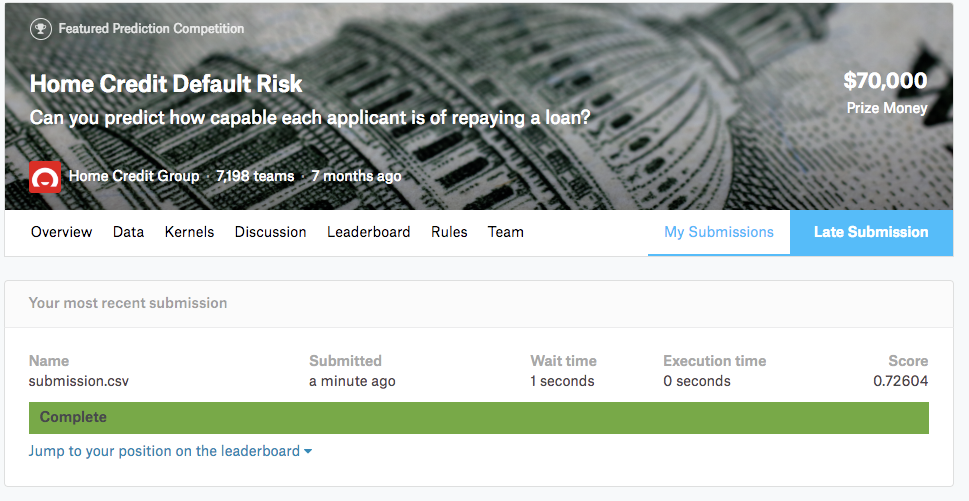

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 
## Abstract
Please provide an abstract summarizing the work you did (150 words)
## Introduction
## Feature Engineering and transformers
Please explain the work you conducted on feature engineering and transformers. 
Please include code sections when necessary as well as images or any relevant material
## Pipelines
Please explain the pipelines you created for this project and how you used them
Please include code sections when necessary as well as images or any relevant material
## Experimental results
Please present the results of the various experiments that you conducted. The results should be shown in a table or image. Try to include the different details for each experiment.  

Please include code sections when necessary as well as images or any relevant material
## Discussion
Discuss  & analyze your different experimental results  

Please include code sections when necessary as well as images or any relevant material
## Conclusion
## Kaggle Submission
Please provide a screenshot of your best kaggle submission.   
The screenshot should show the different details of the submission and not just the score.

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)
